In [13]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from plot_days_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort2")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# ANIMALS
ANIMAL_IDS = [
    "R020",
    "R021",
    "R022",
    "R023",
    "R024",
    "R025",
    "R026",
    "R027",
    "R028",
    "R029",
]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [15]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
)

[2023-12-04 17:04:53,798][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 17 sessions for R020 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R021 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R022 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R023 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R024 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R025 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R026 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R027 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R028 between 2023-11-14 and 2023-12-04
fetched 17 sessions for R029 between 2023-11-14 and 2023-12-04


In [16]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R02s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-11-14 -> 2023-12-04
Returning appended df with entries between 2023-11-14 and 2023-12-04
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R02s_days_df.csv


c:\Users\JB\github\jbreda_animal_training\code\training_performance\plot_days_info.py:958: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


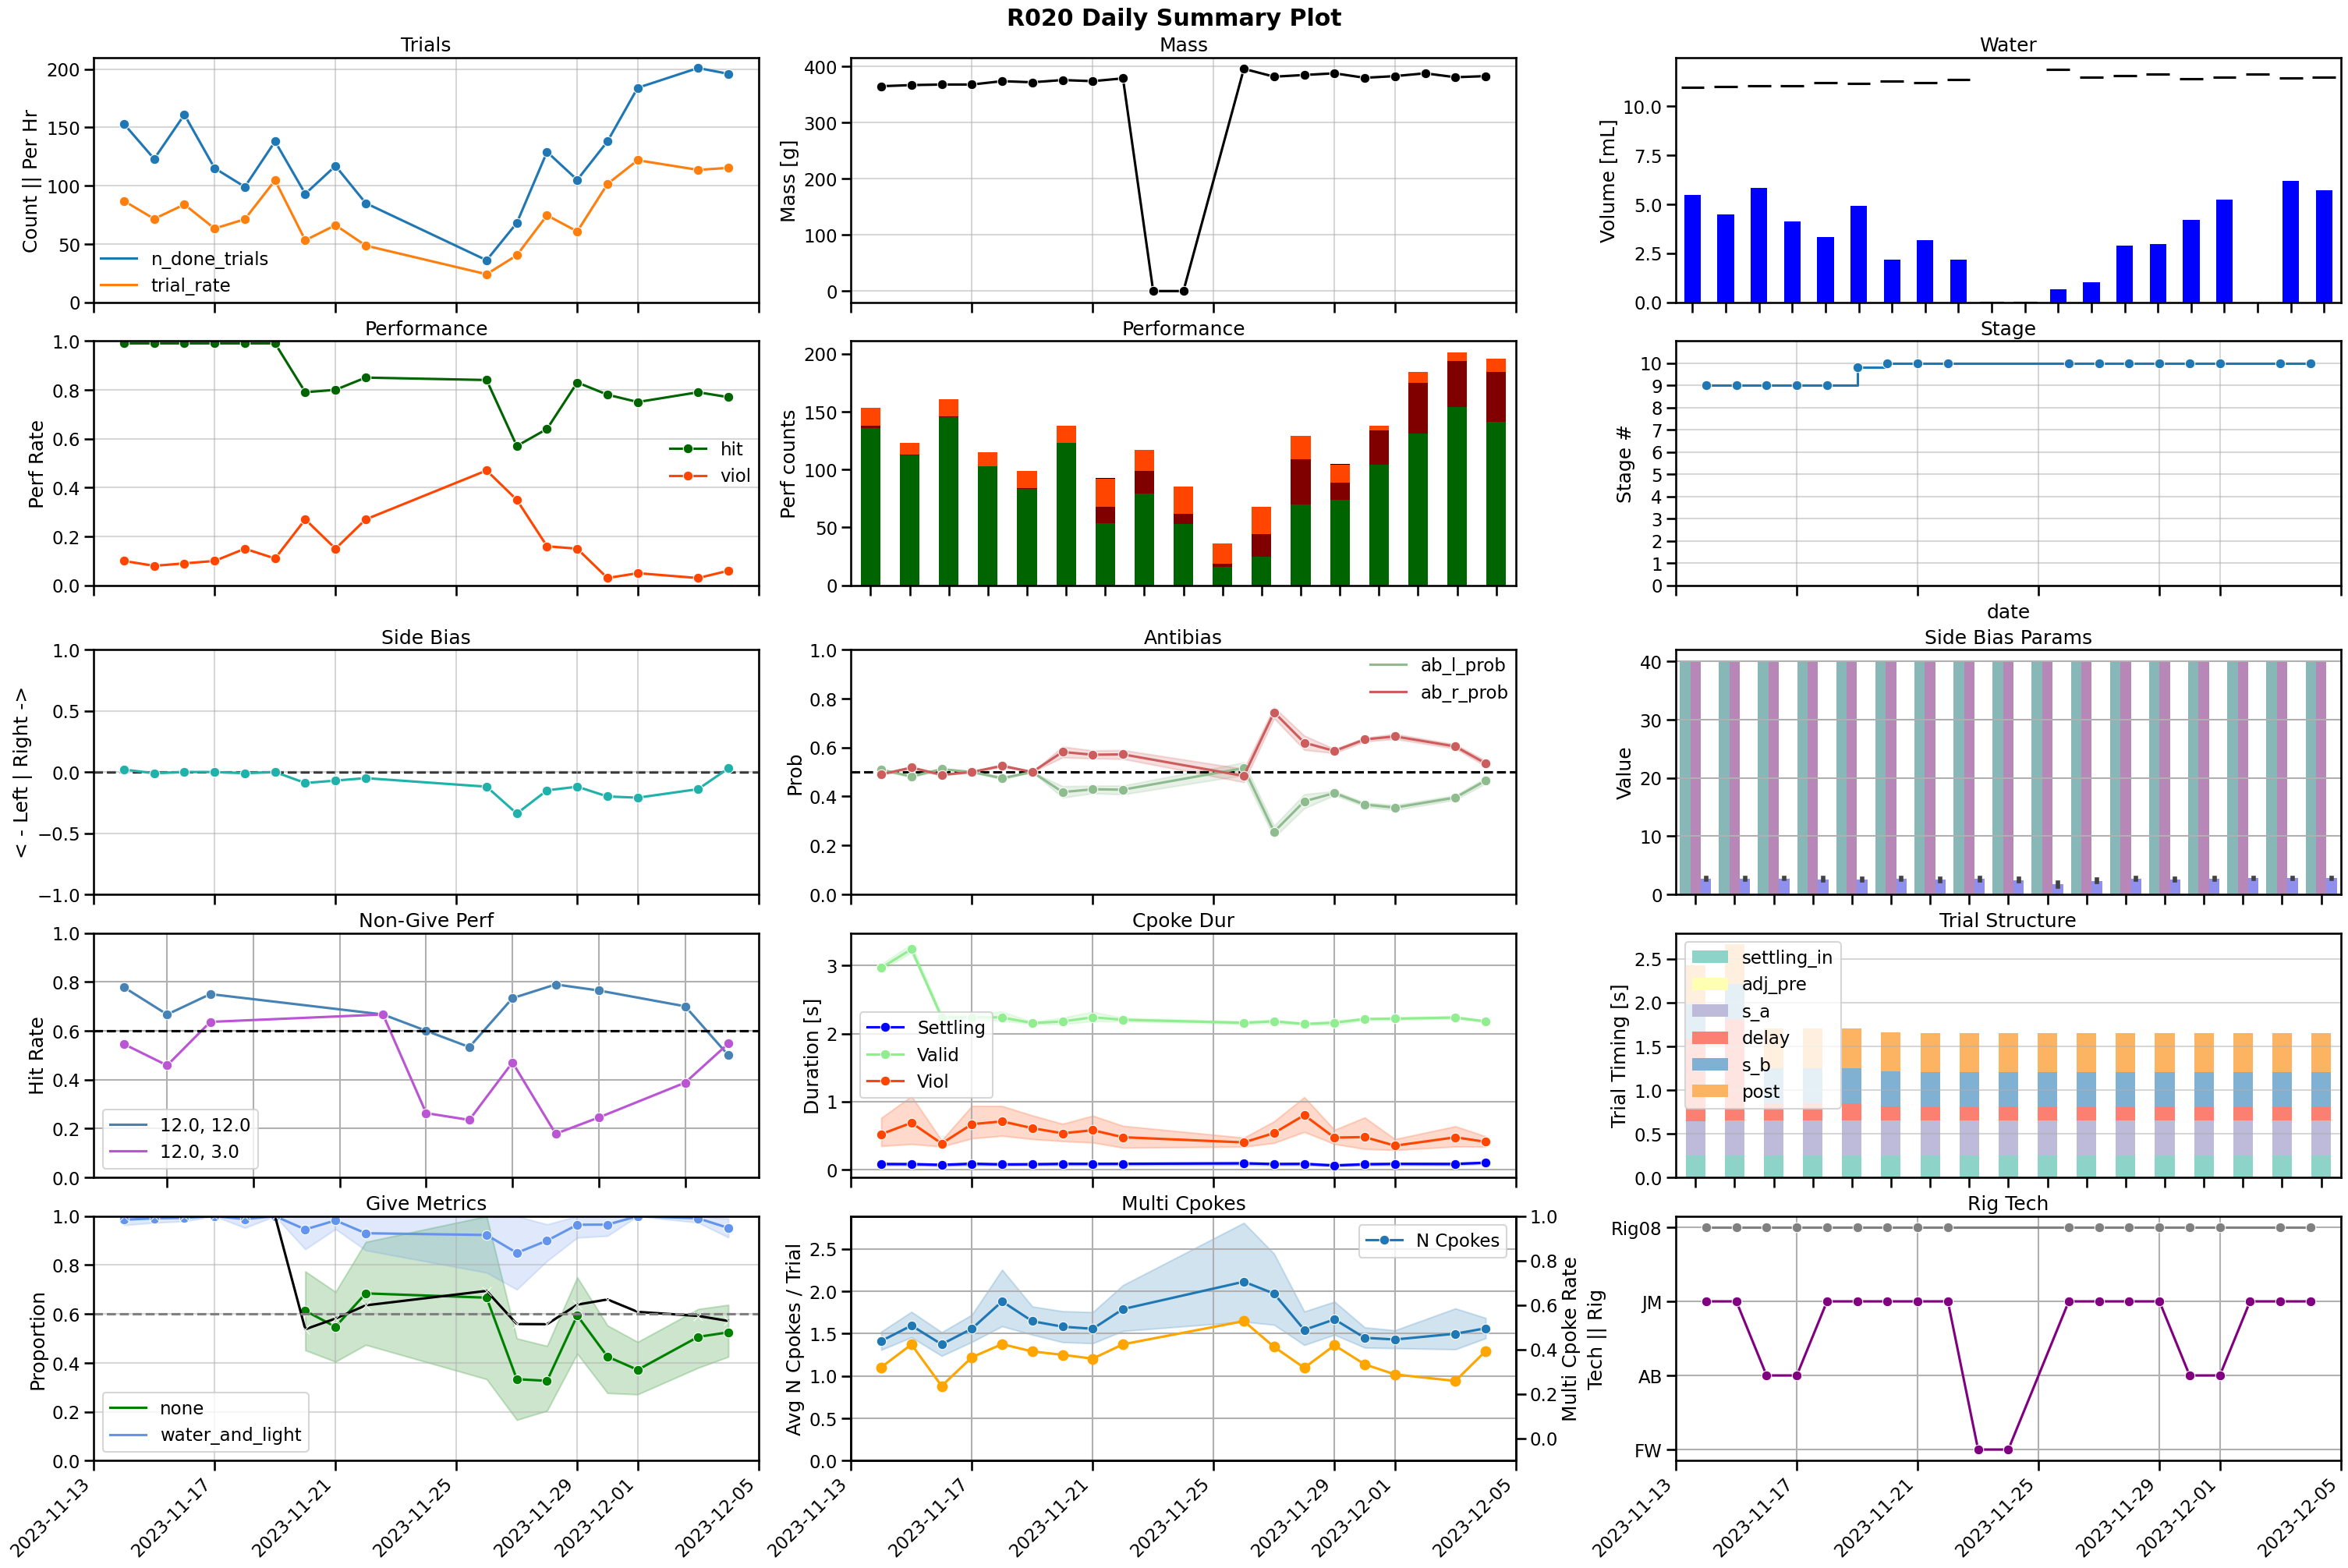

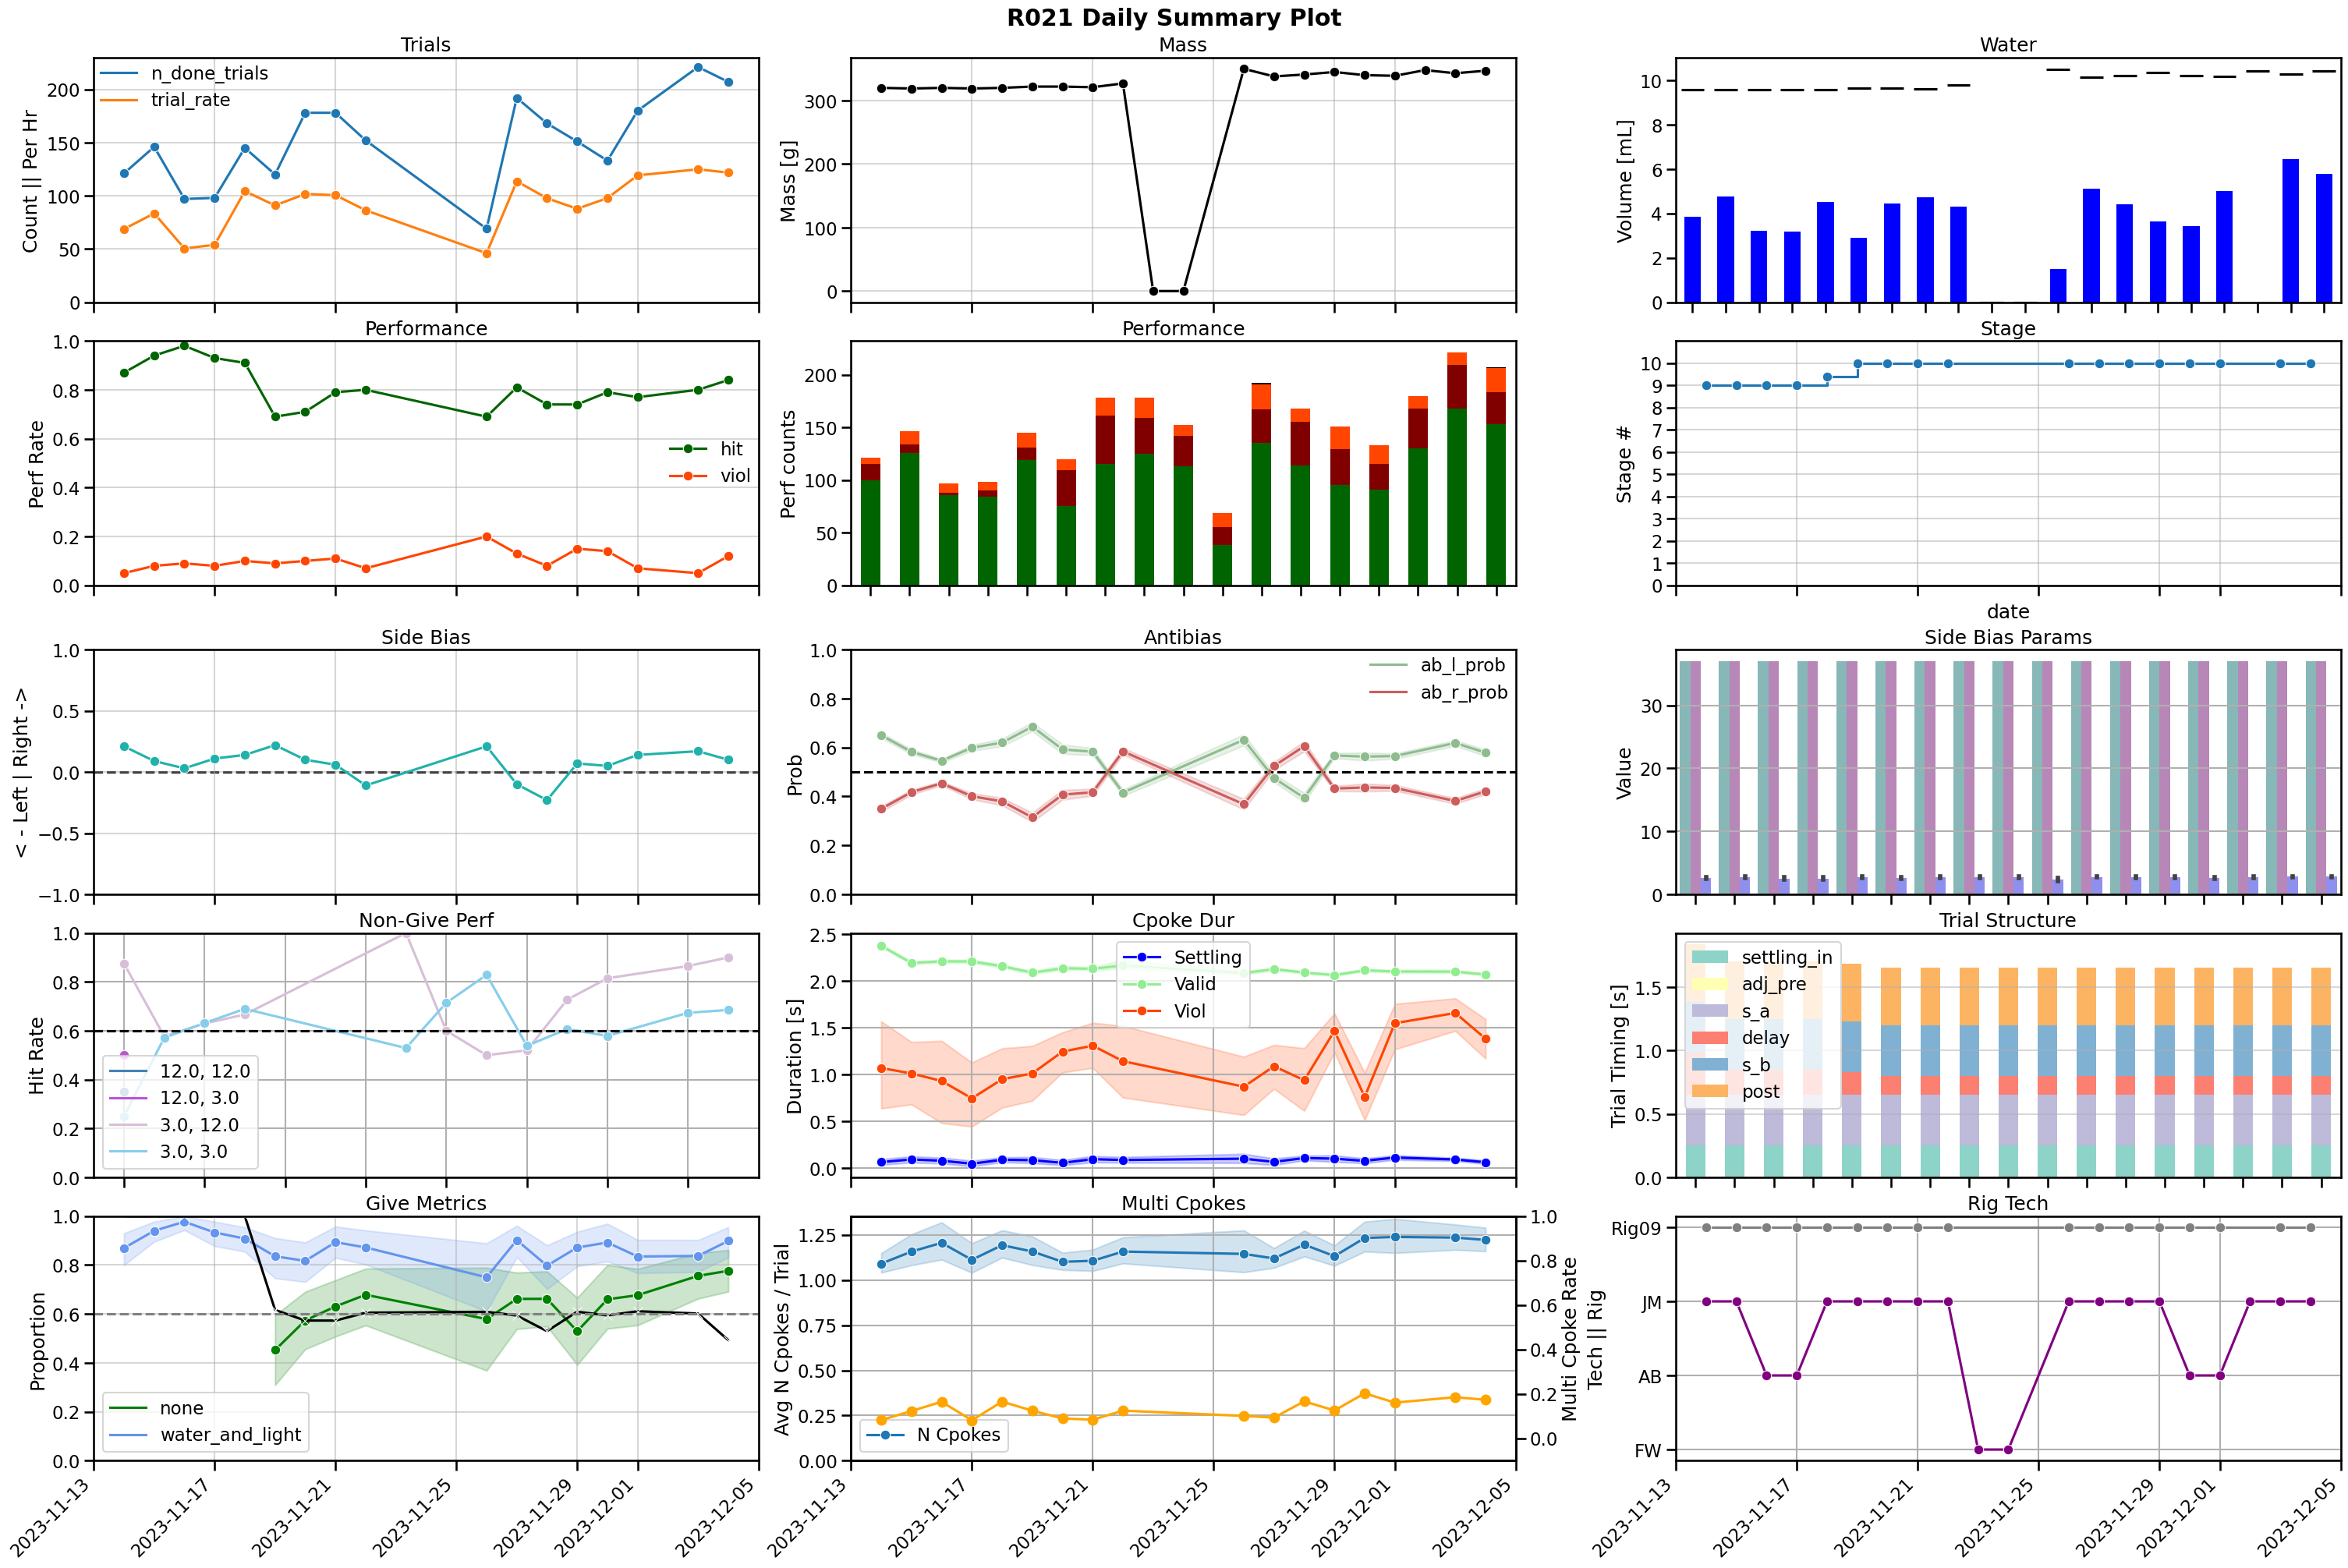

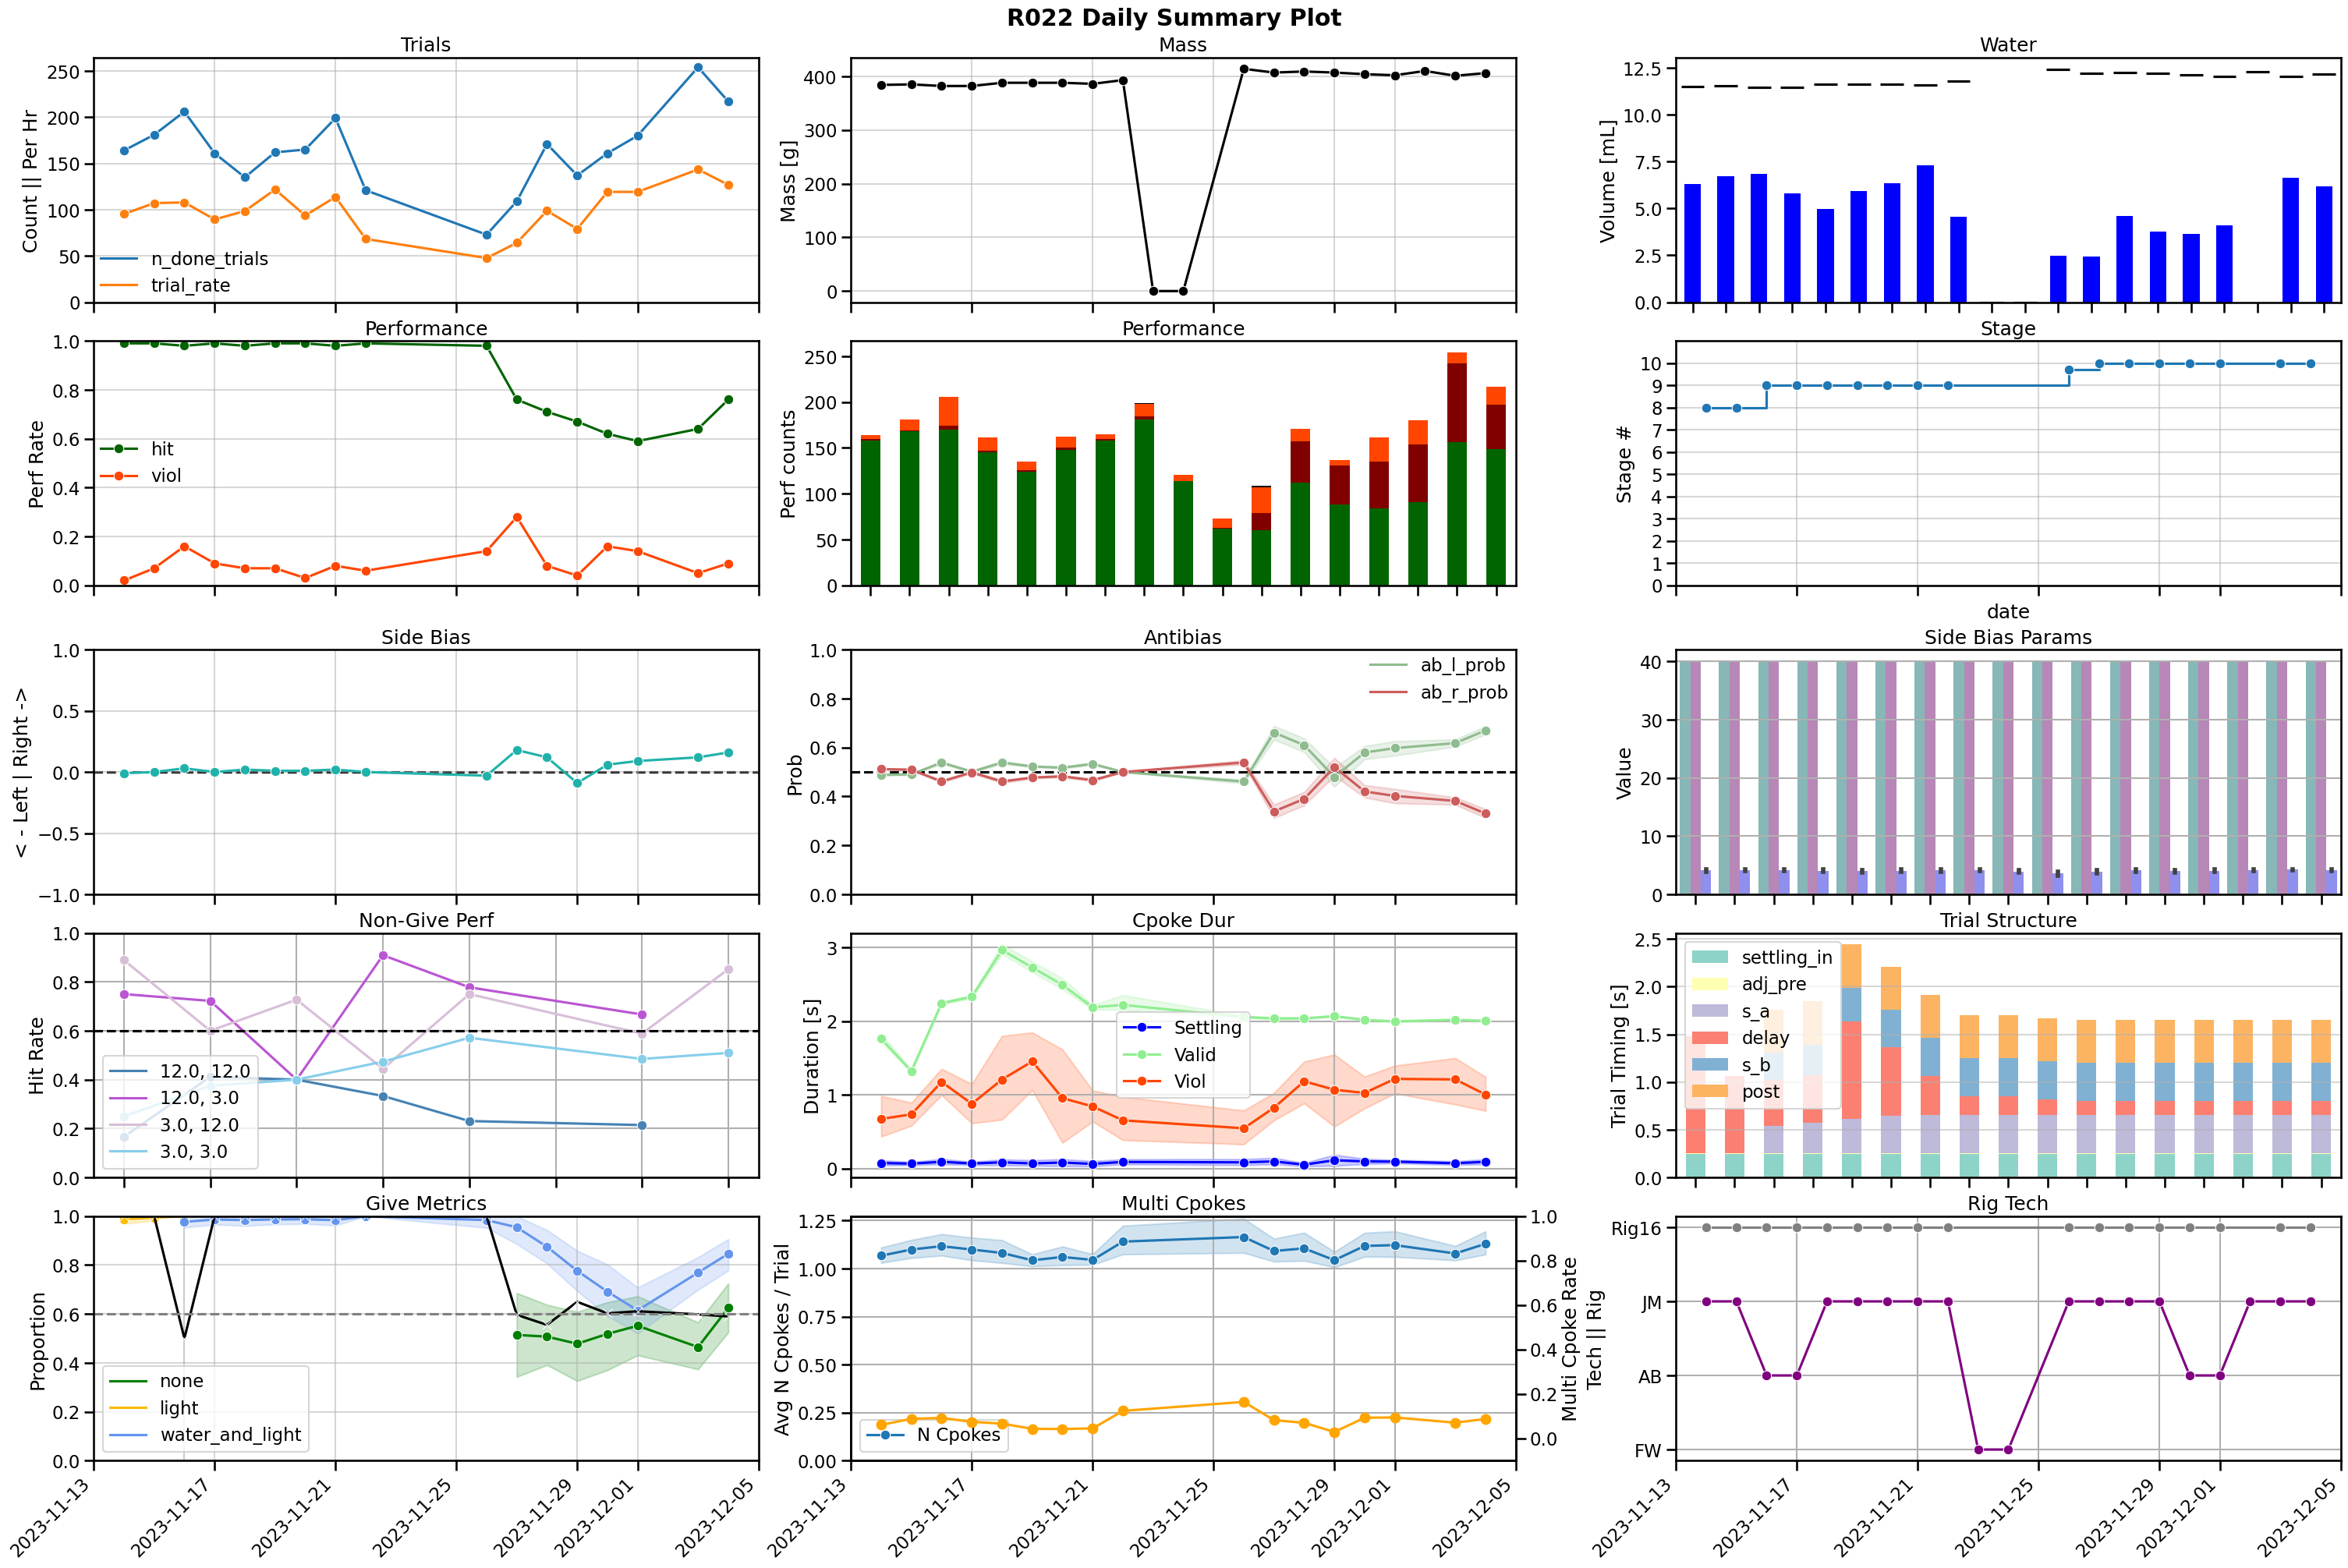

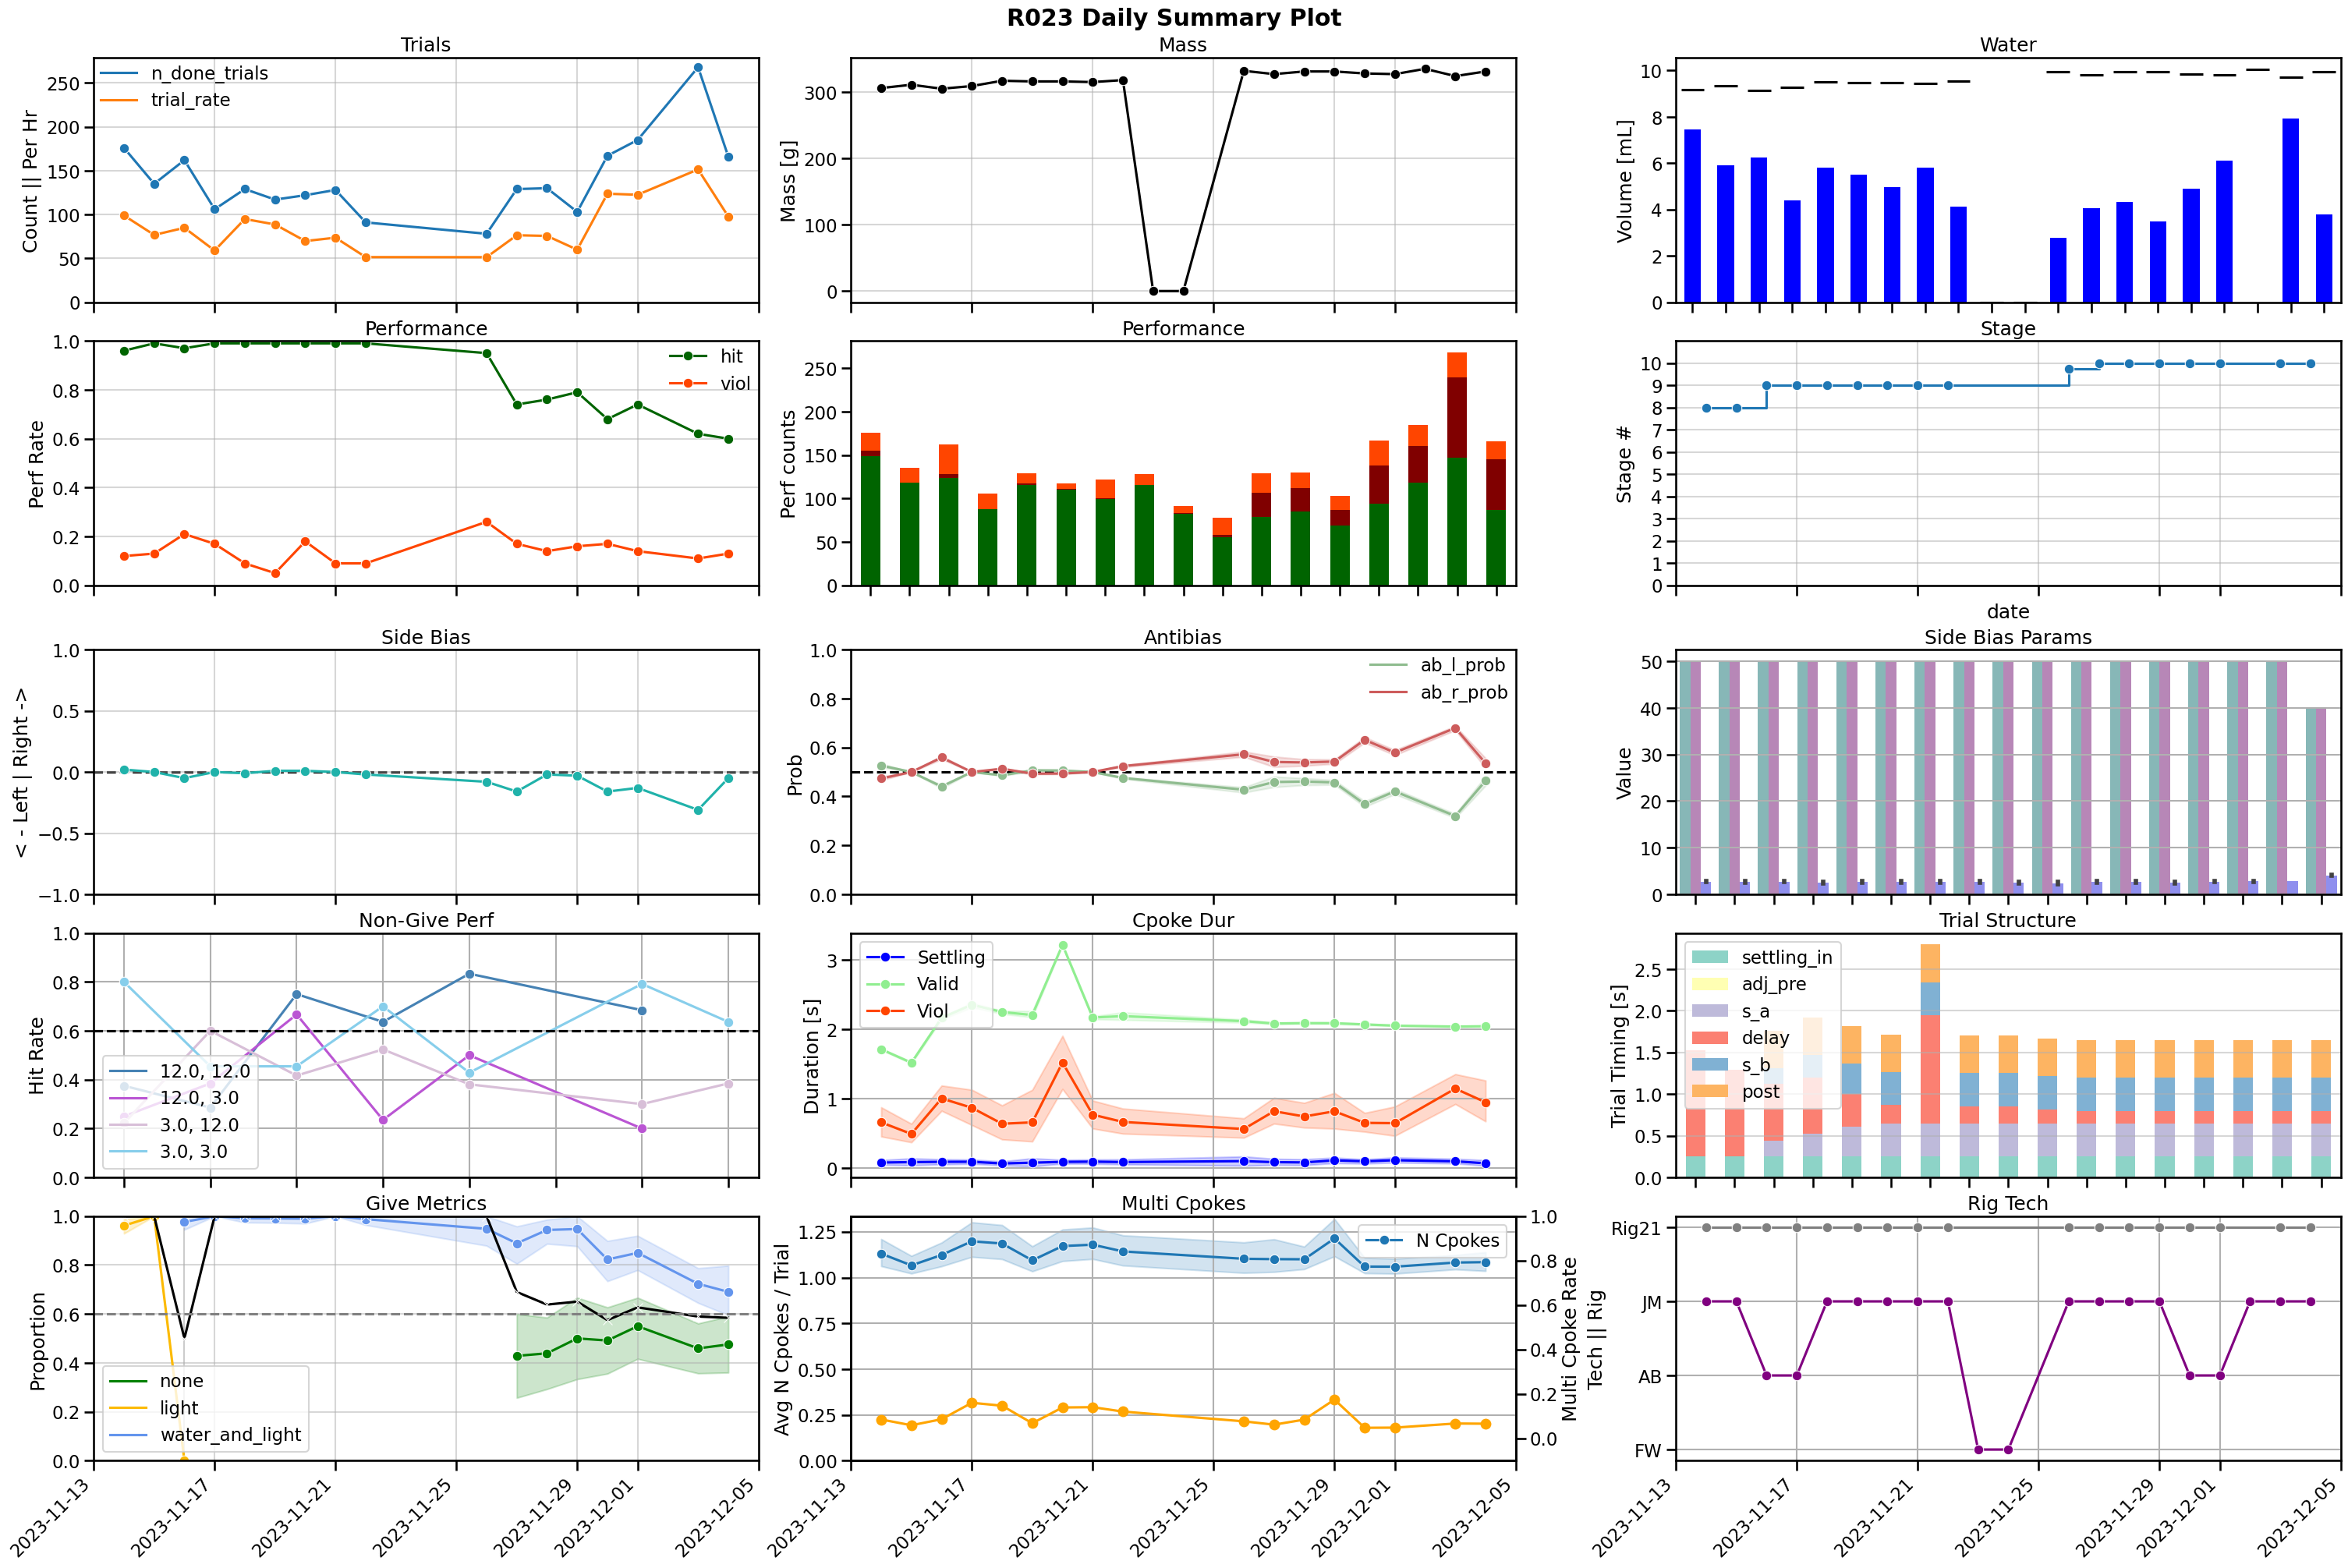

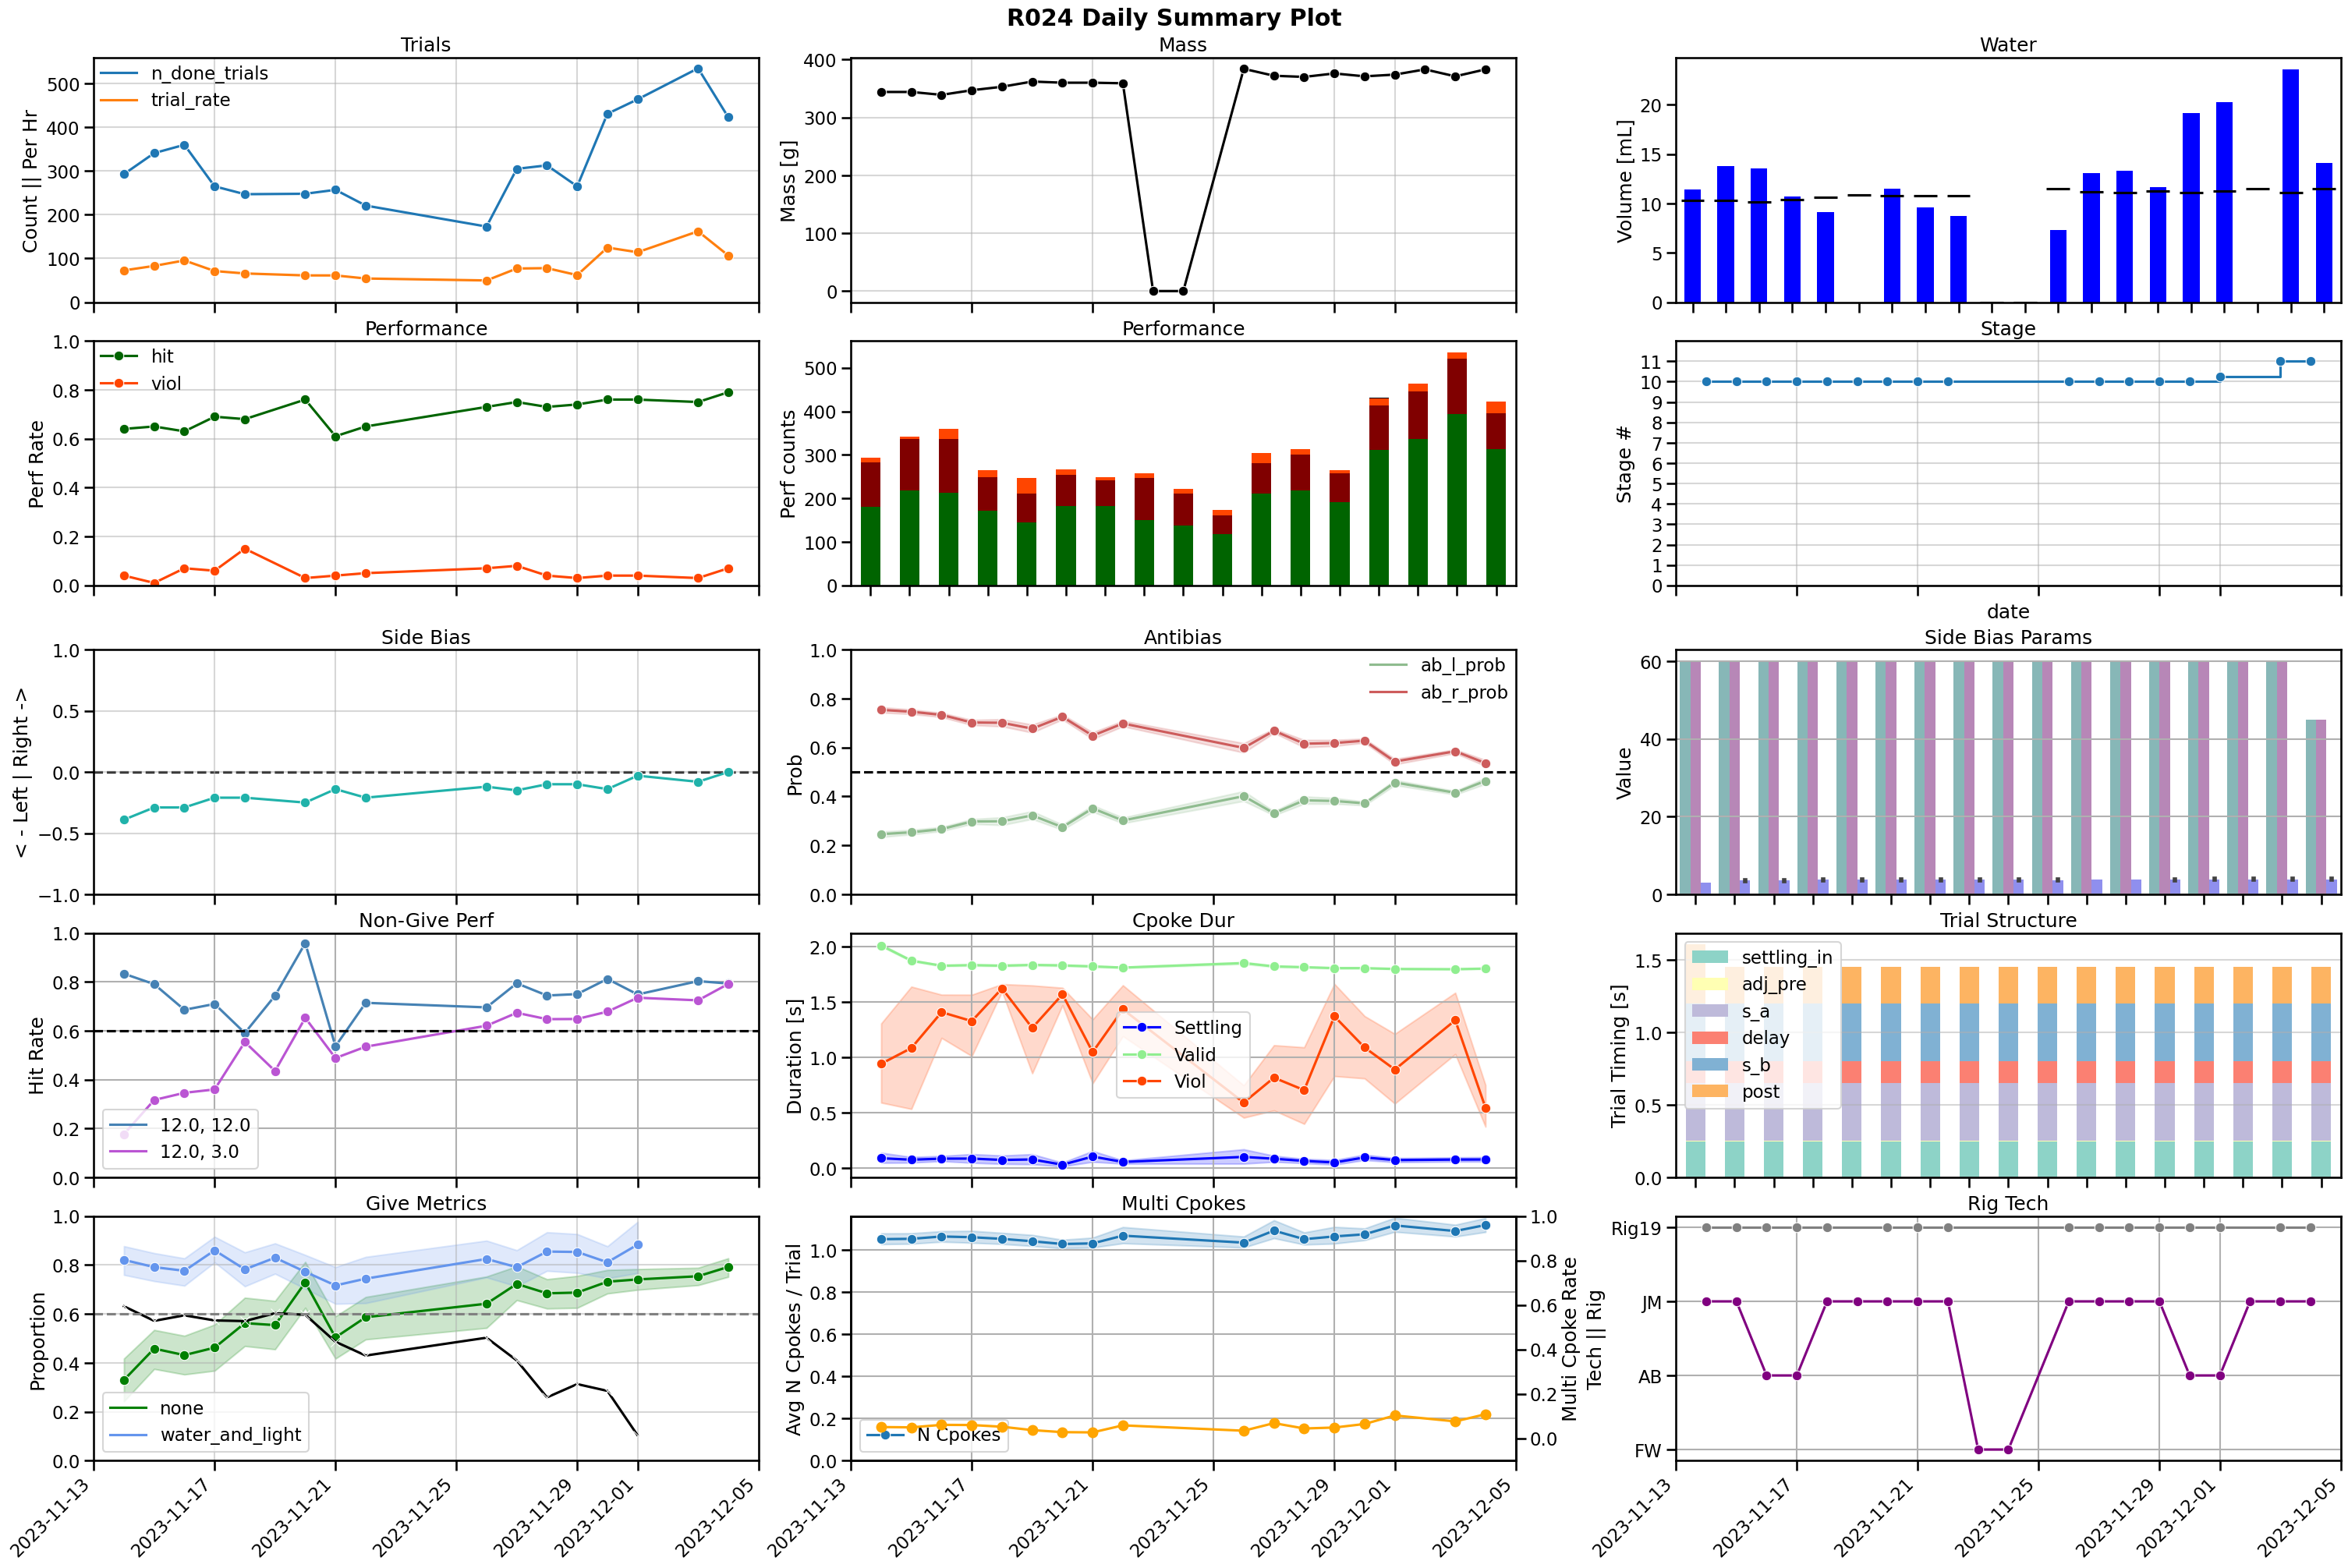

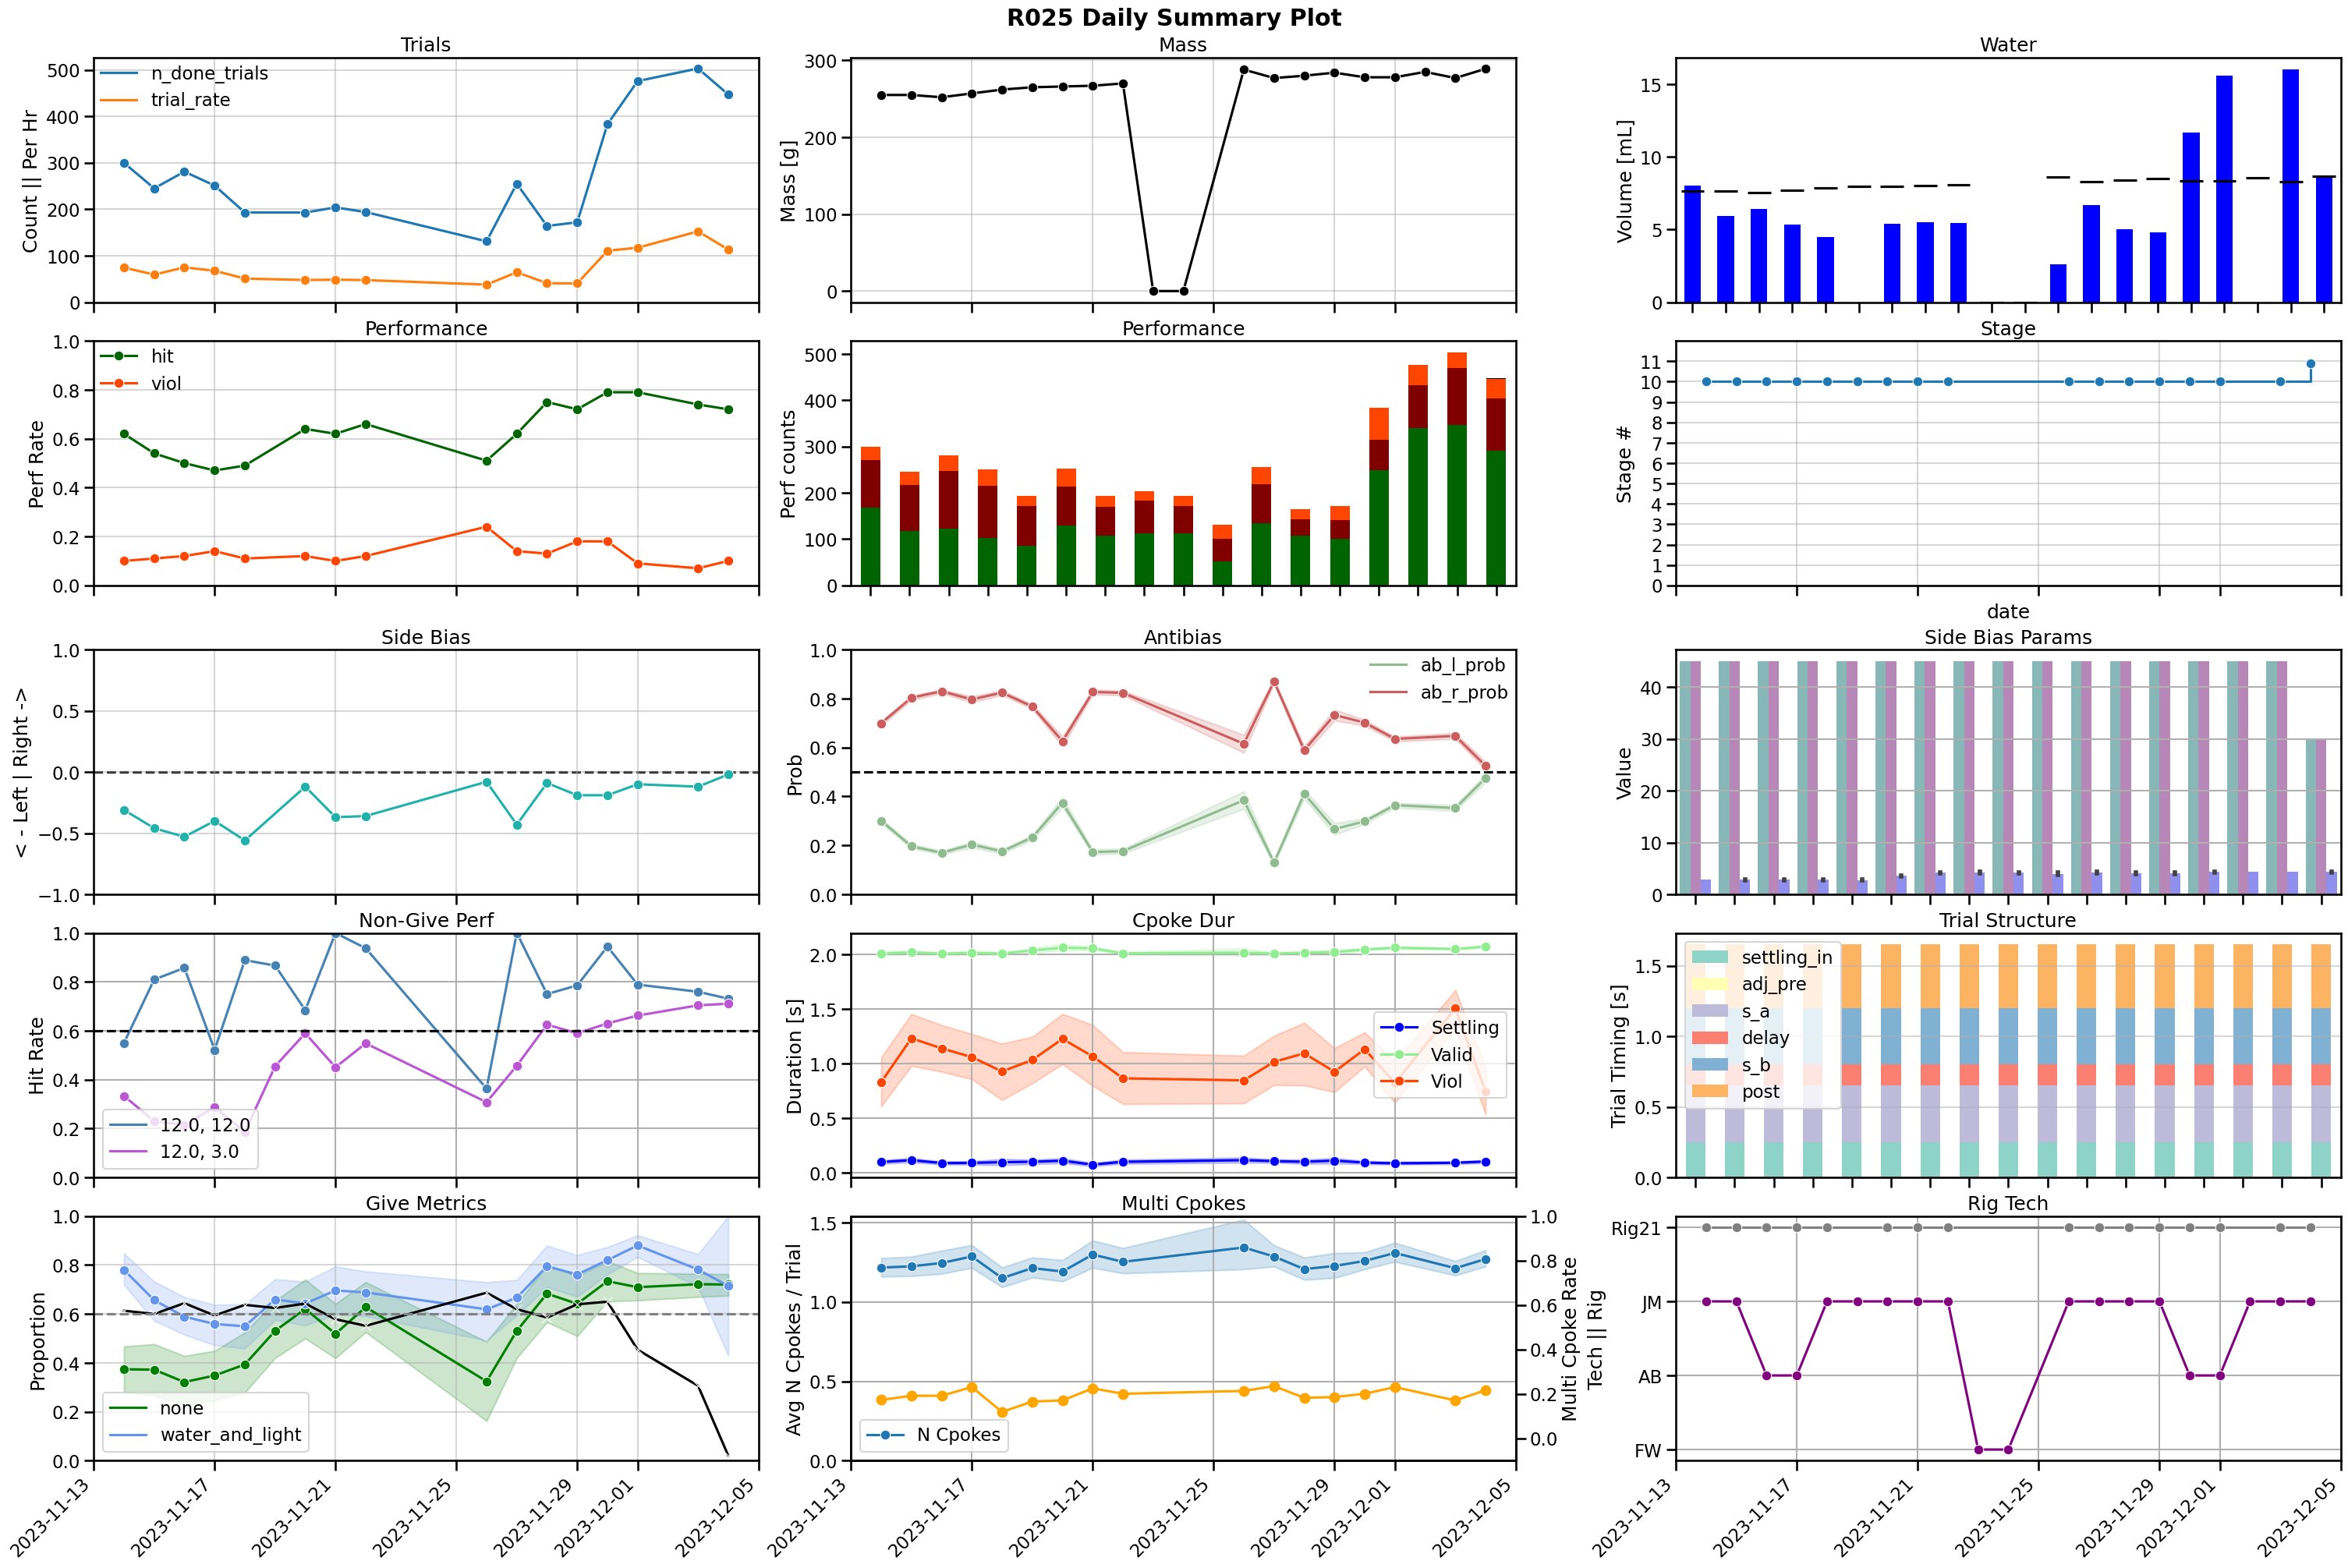

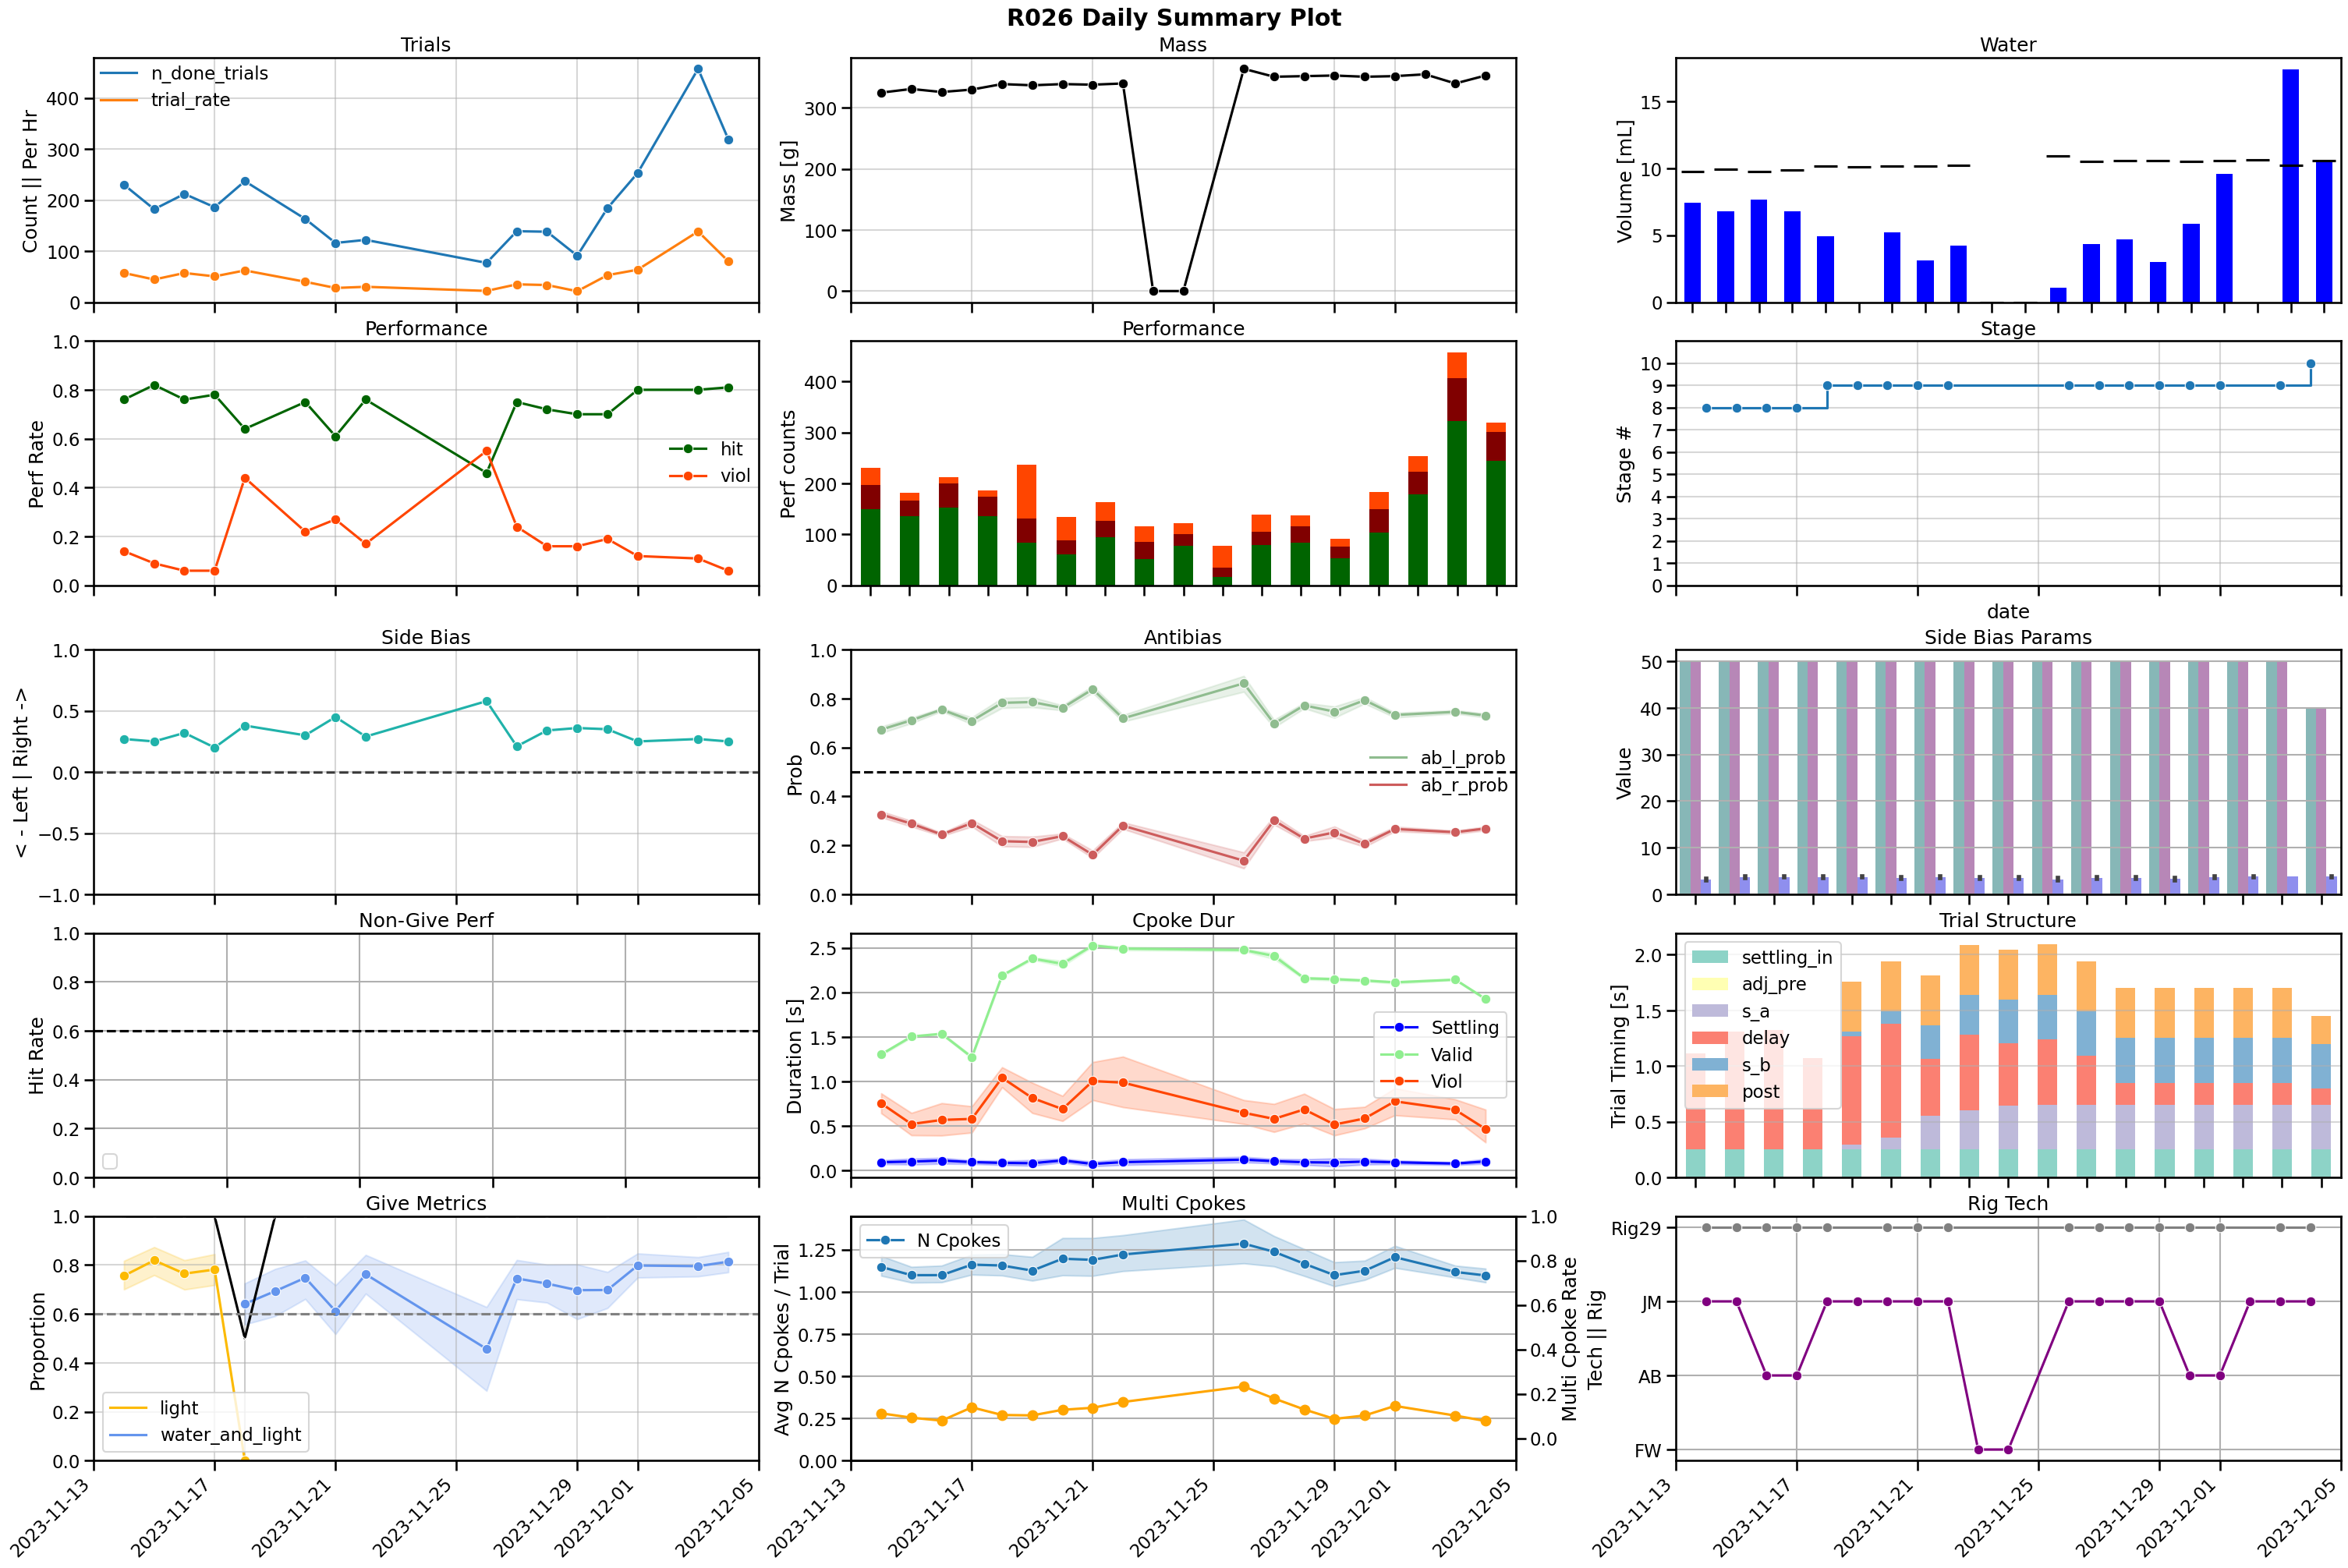

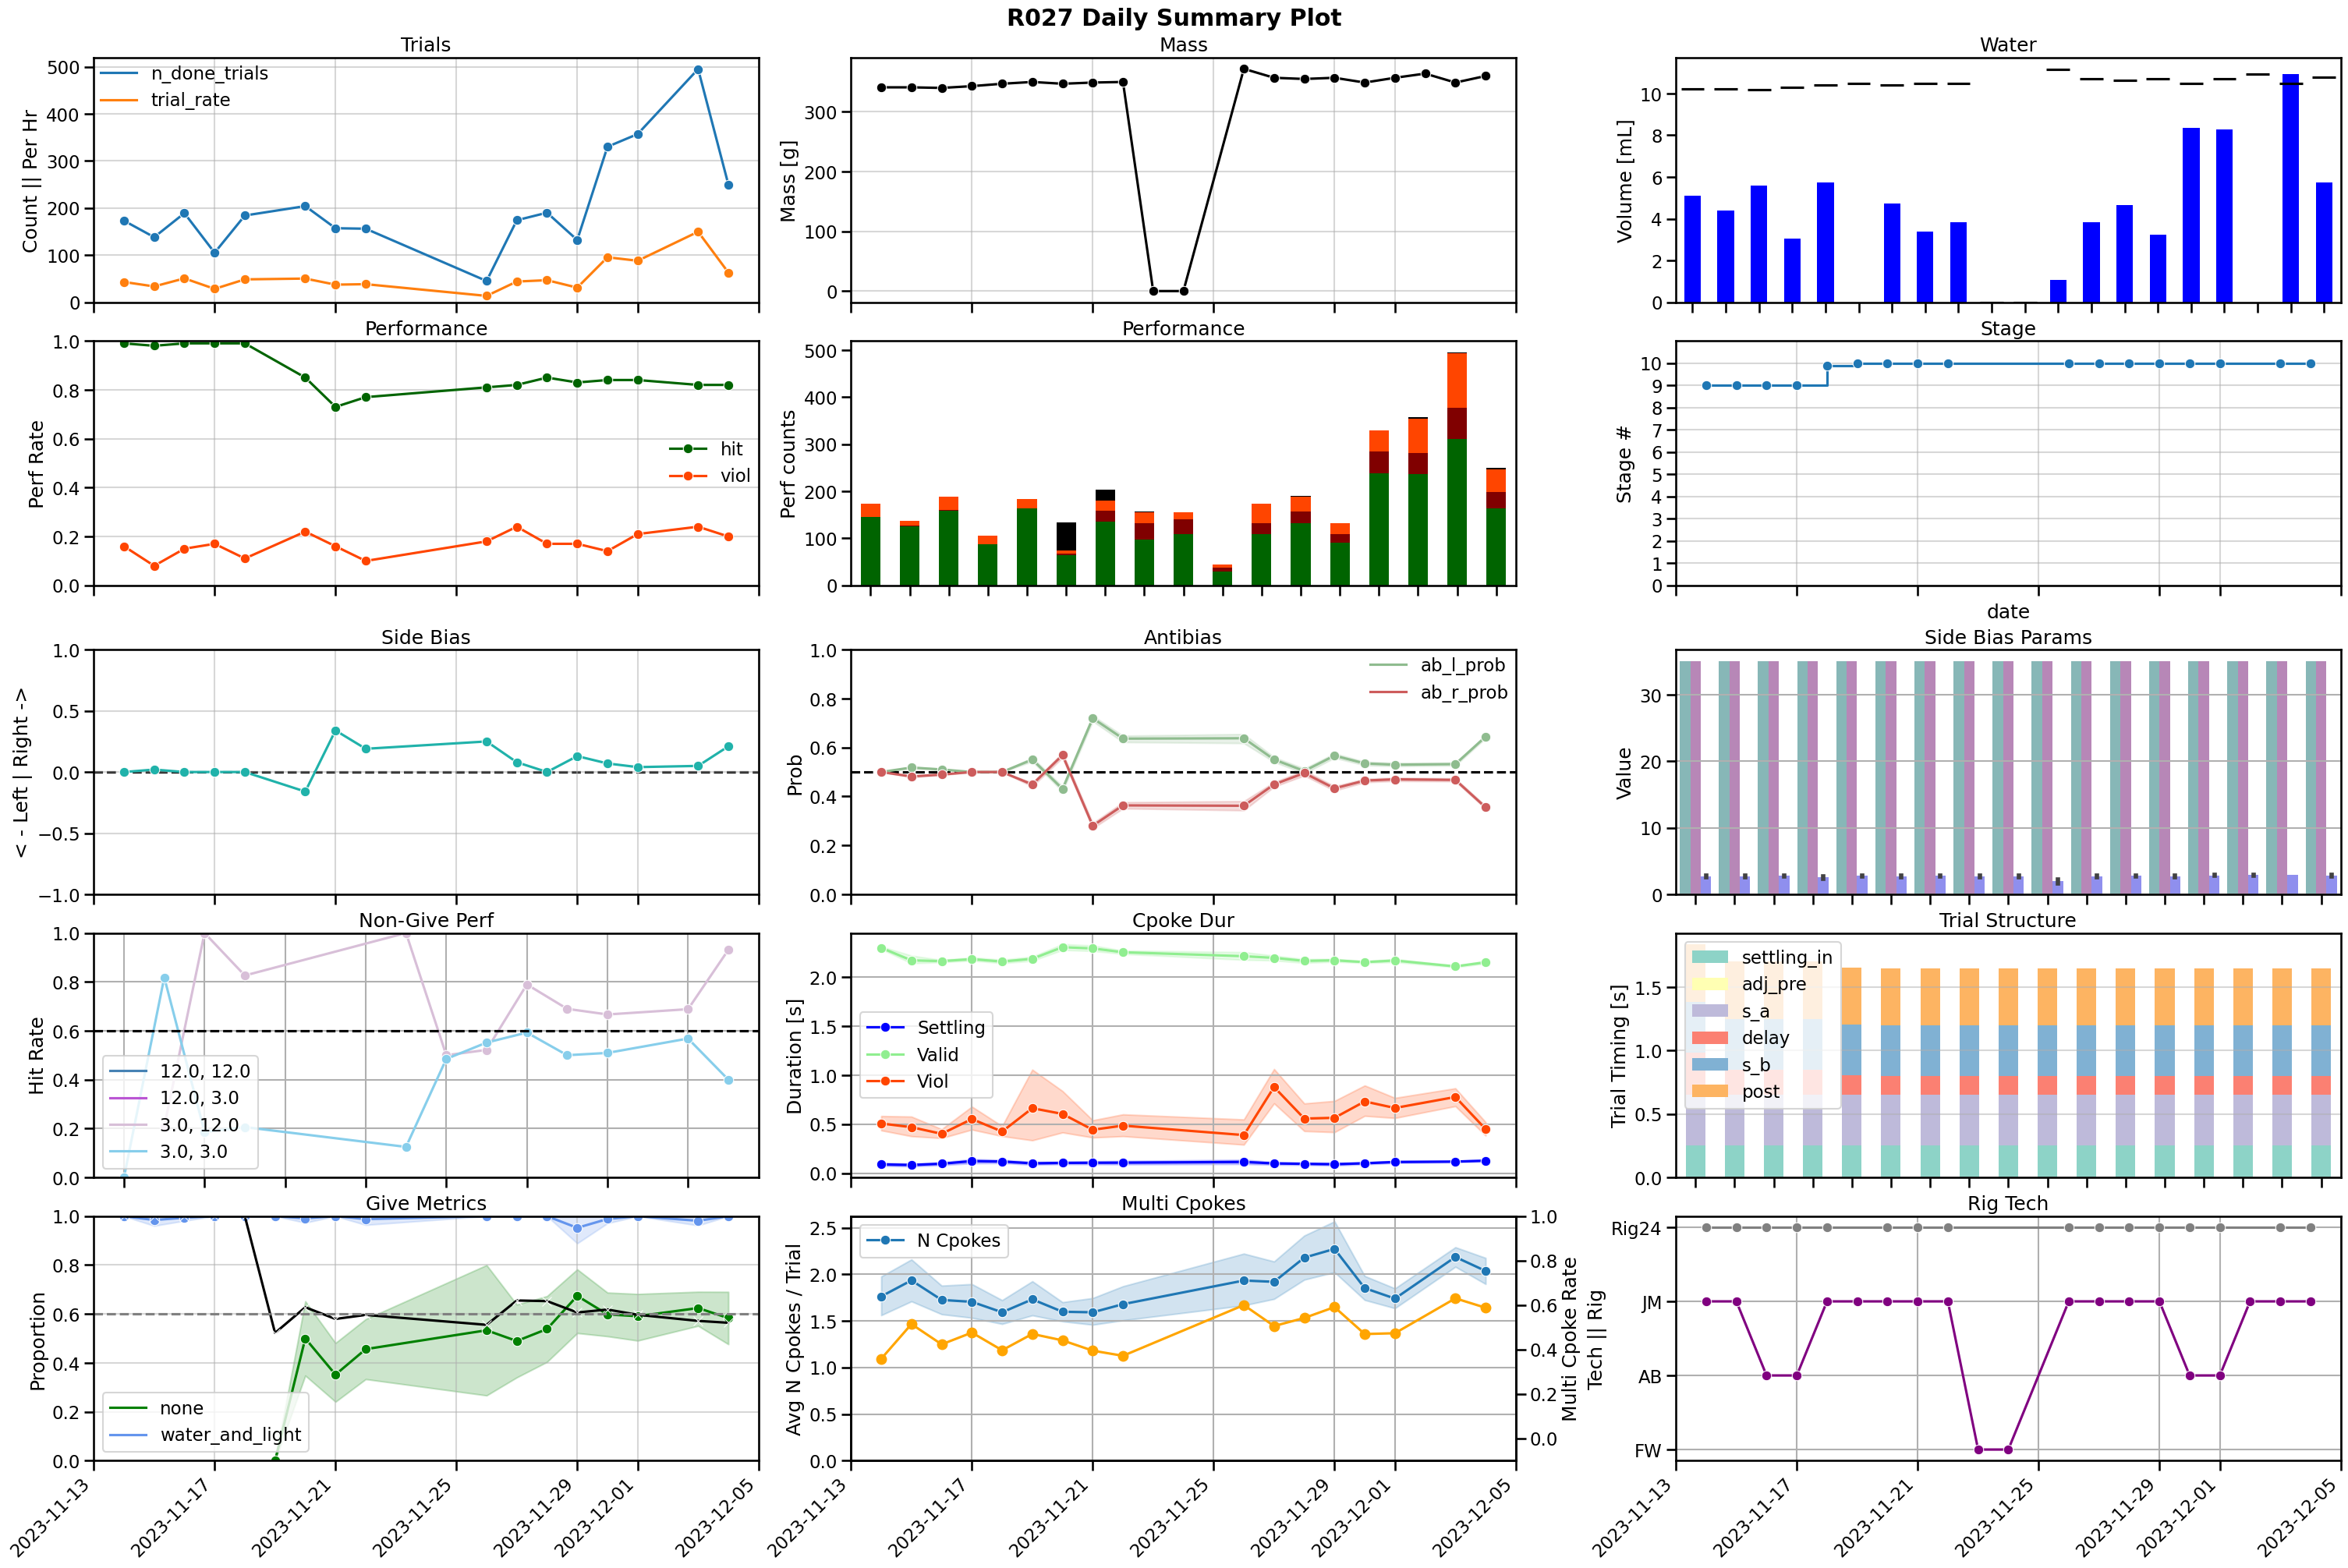

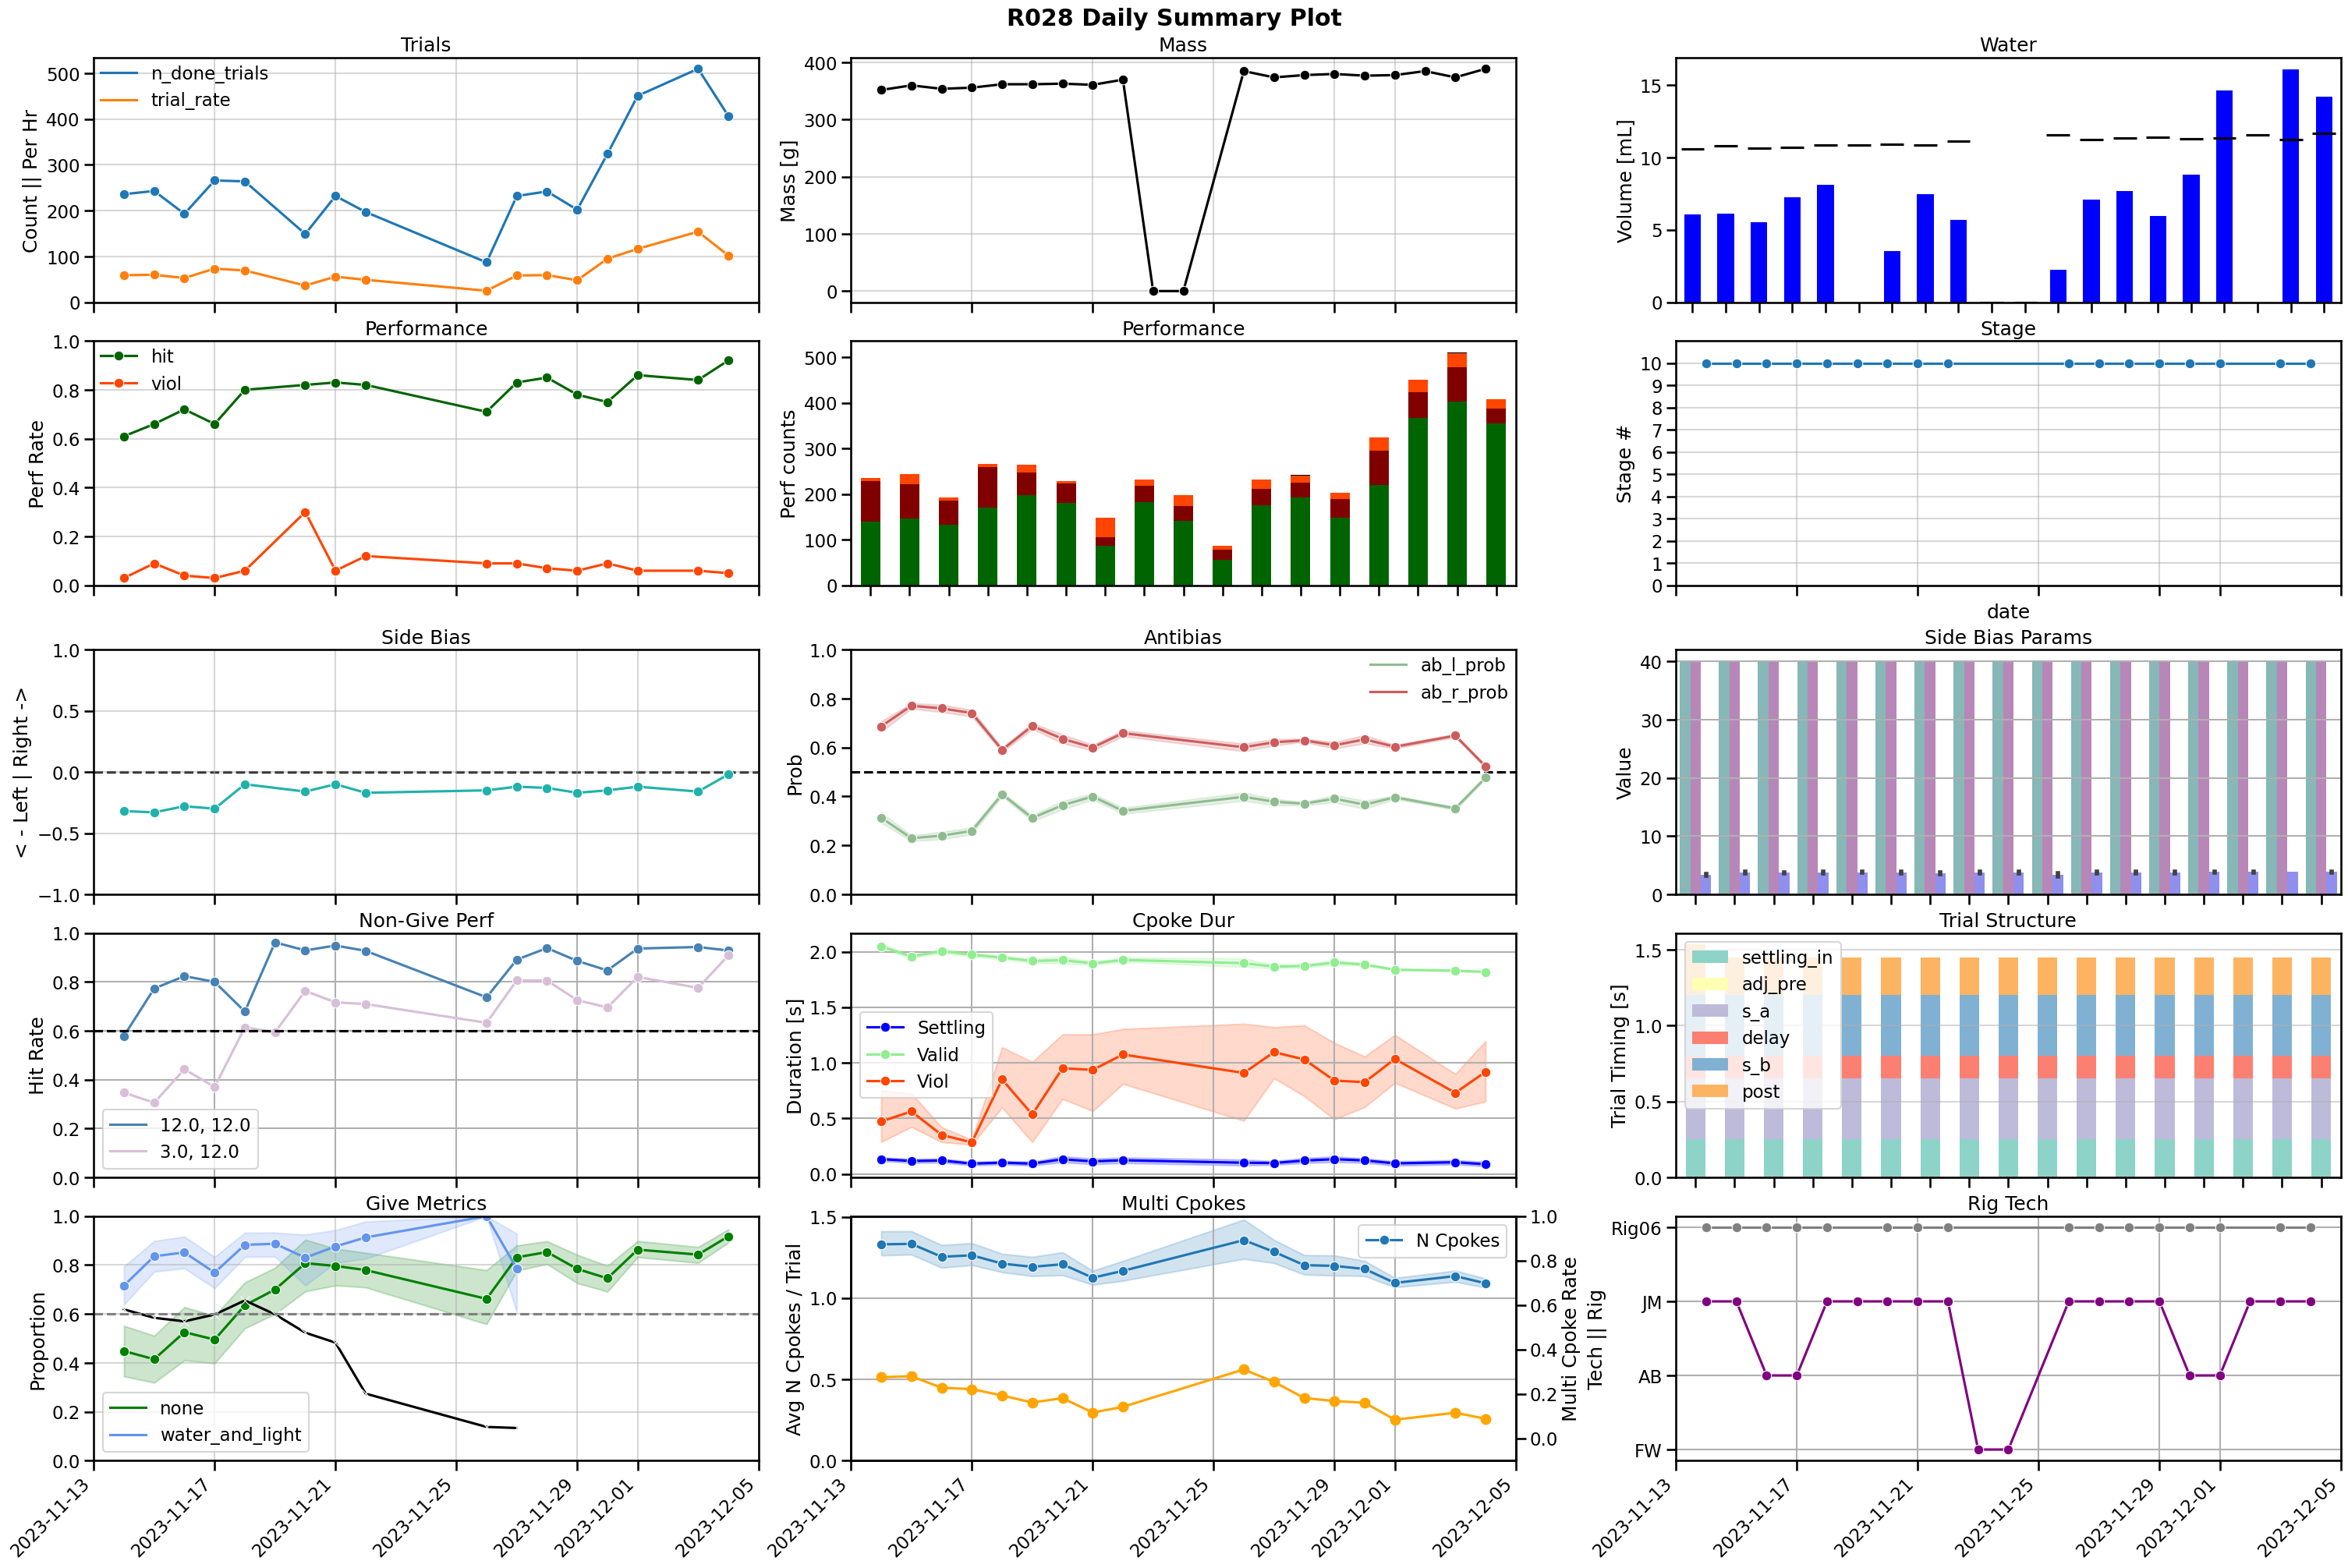

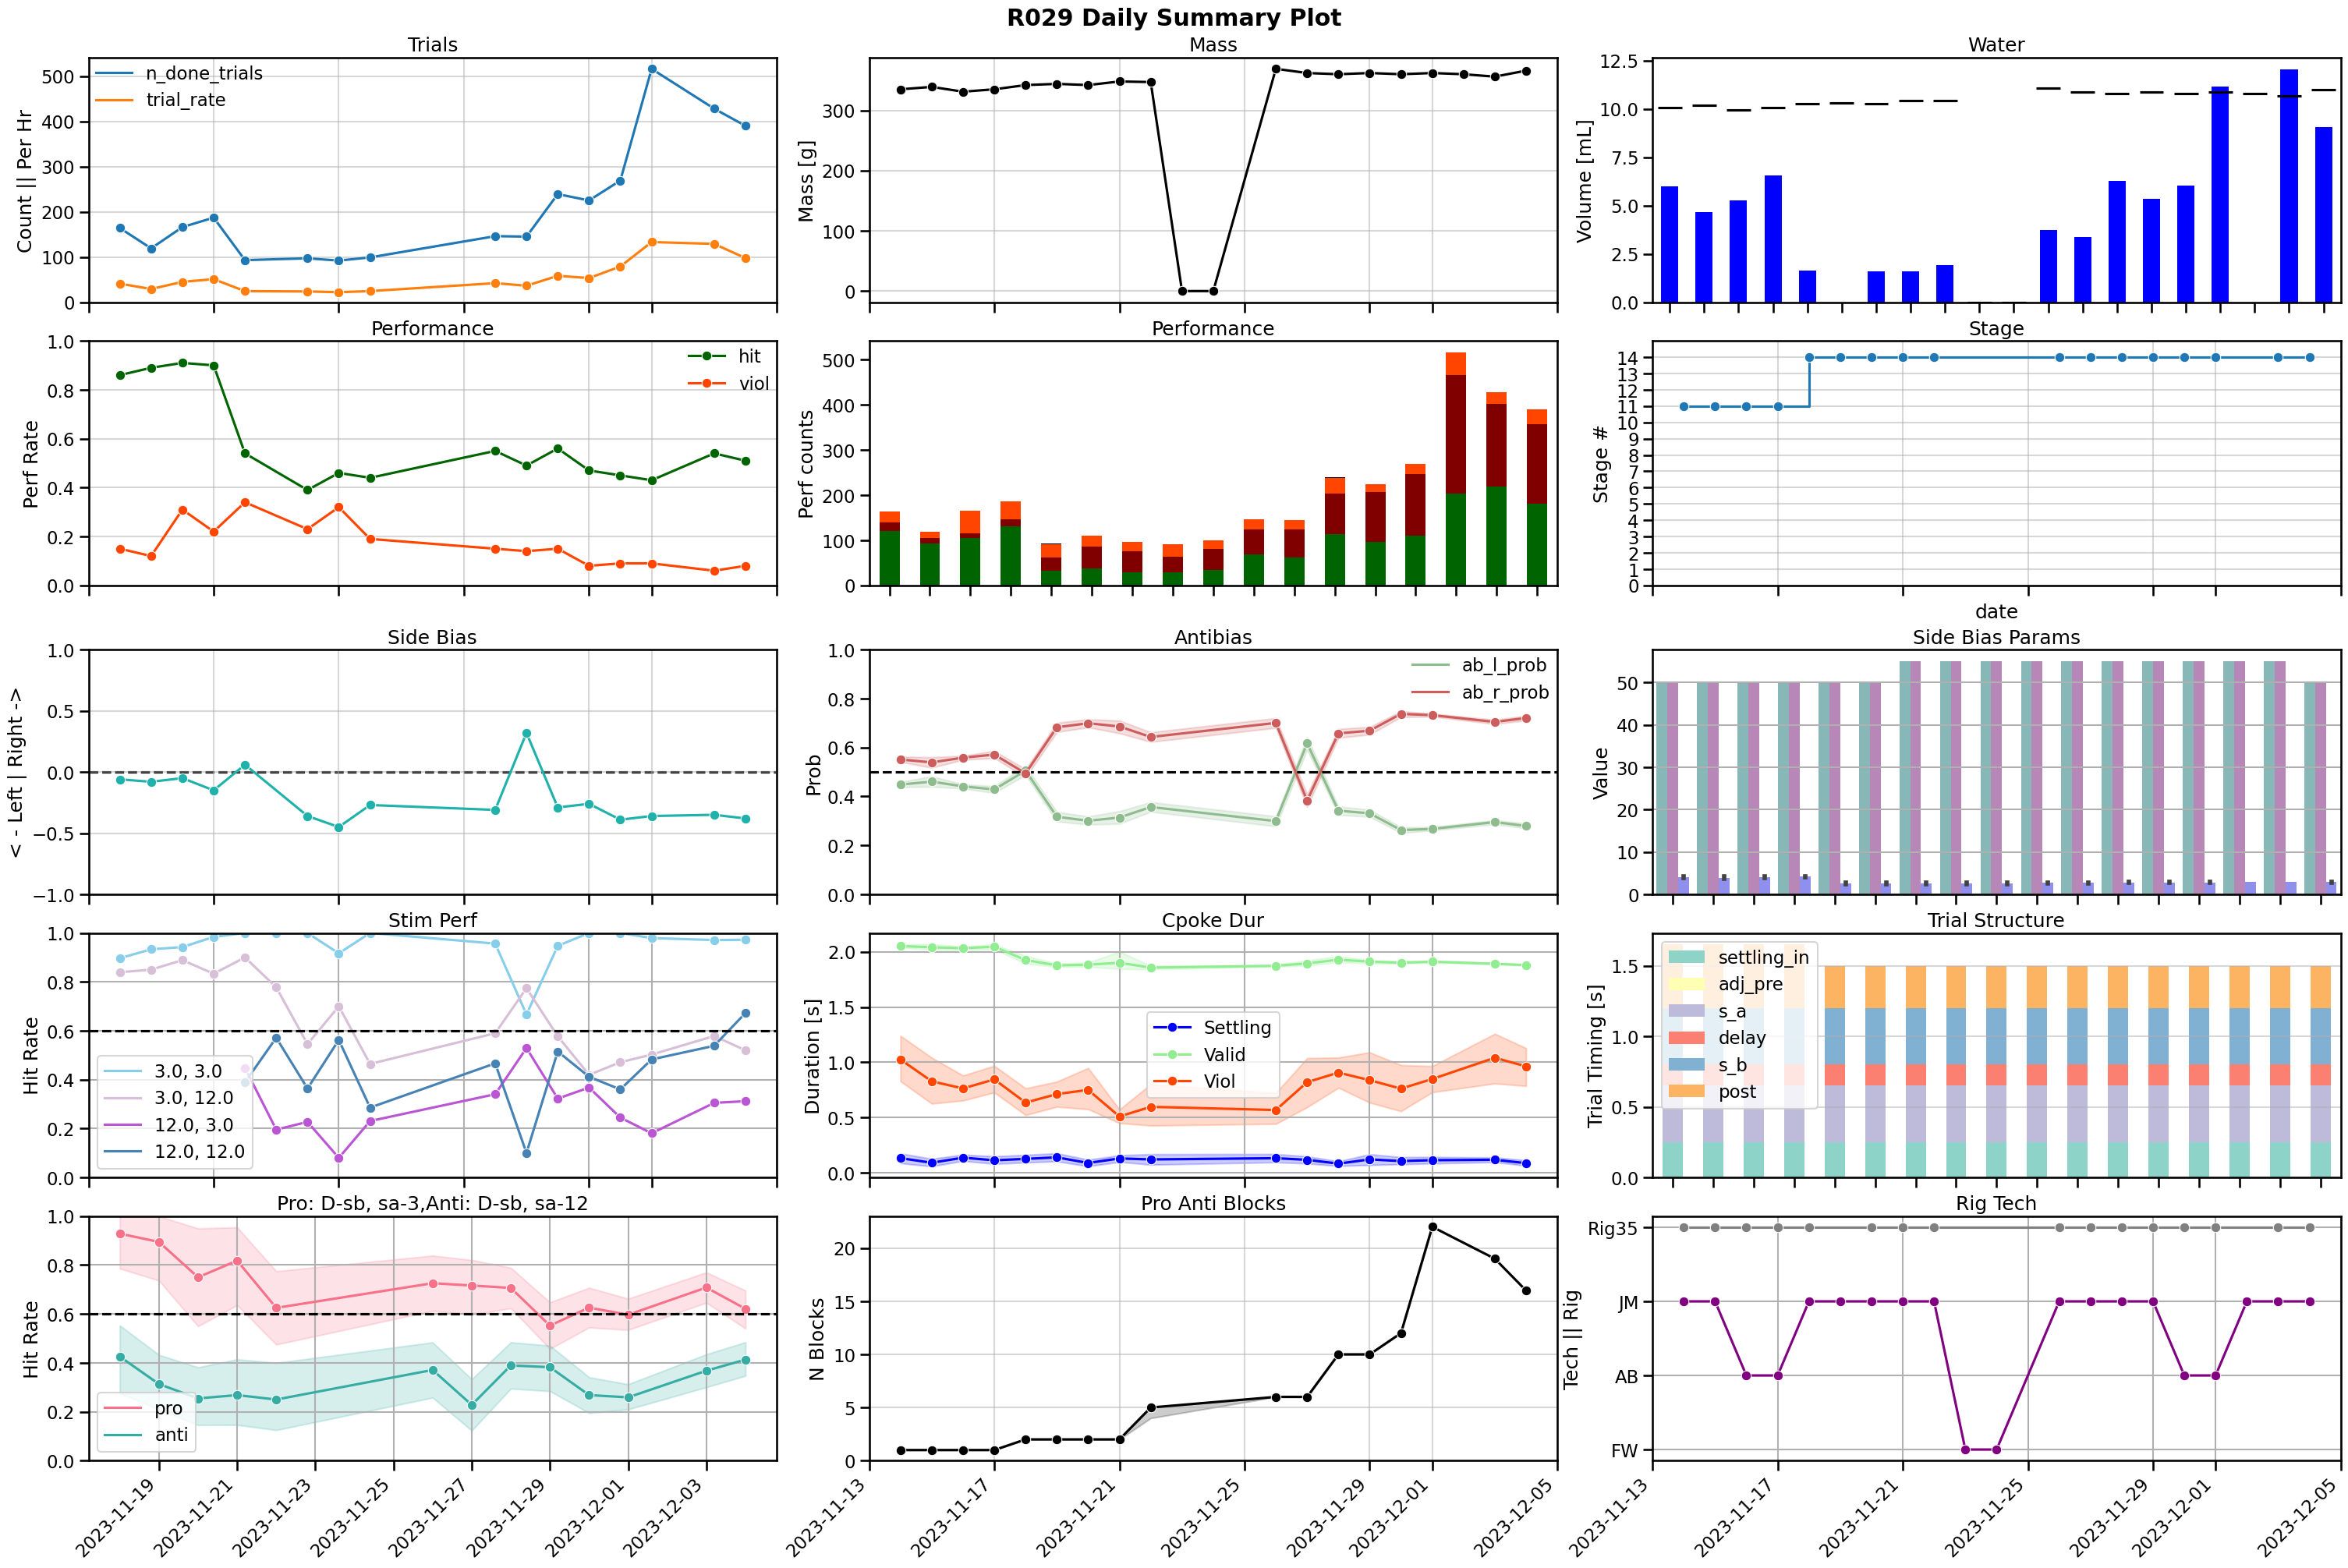

In [17]:
# PLOT DAYS DATA
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    if animal_id == "R030":
        pass
    else:
        multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [18]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R020_2023-12-04_day_summary
['s_a', 'delay']
making R021_2023-12-04_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R022_2023-12-04_day_summary
['s_a', 's_b', 'post', 'go']
making R023_2023-12-04_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R024_2023-12-04_day_summary
['s_a', 'post', 'go']
making R025_2023-12-04_day_summary
['adj_pre', 's_a', 'post', 'go']
making R026_2023-12-04_day_summary
['s_a', 's_b', 'go']
making R027_2023-12-04_day_summary
['s_a', 'delay', 's_b', 'post']
making R028_2023-12-04_day_summary
['s_a', 's_b', 'post', 'go']
making R029_2023-12-04_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
